In [1]:
import keras
from acgan import ACGAN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

import cv2

Using TensorFlow backend.


In [2]:
train = pd.read_csv("data/fashion-mnist_train.csv")
test = pd.read_csv("data/fashion-mnist_test.csv")

In [3]:
def split_data_target(df, target='label'):
    
    X, y = df.drop(target, axis=1), df[target]
    
    return X, y

In [4]:
X_train, y_train = split_data_target(df=train)
X_test, y_test = split_data_target(df=test)

In [5]:
img_dim = np.int(np.sqrt(X_train.values[0].shape[0]))
img_channels = 1

In [6]:
print("Image shape:", X_train.values[0].shape)
print("Reshaped Image shape:", X_train.values[0].reshape(img_dim, img_dim).shape)

Image shape: (784,)
Reshaped Image shape: (28, 28)


In [7]:
def plot_random(shape=(1,4)):
    
    _, axarr = plt.subplots(shape[0], shape[1], figsize=(18, 12))
    data_size = X_train.shape[0]
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            
            rand_int = np.random.randint(0, data_size)
            
            rand_img = X_train.values[rand_int].reshape(img_dim, img_dim, 1)
            rand_label = y_train.values[rand_int]
            
            if shape[0]==1:
                axarr[i].imshow()
                axarr[i].set_title()
            else:
                axarr[i, j].imshow(X_train.values[rand_int].reshape(img_dim, img_dim), cmap='gray')
                axarr[i, j].set_title(y_train.values[rand_int])
    plt.show()

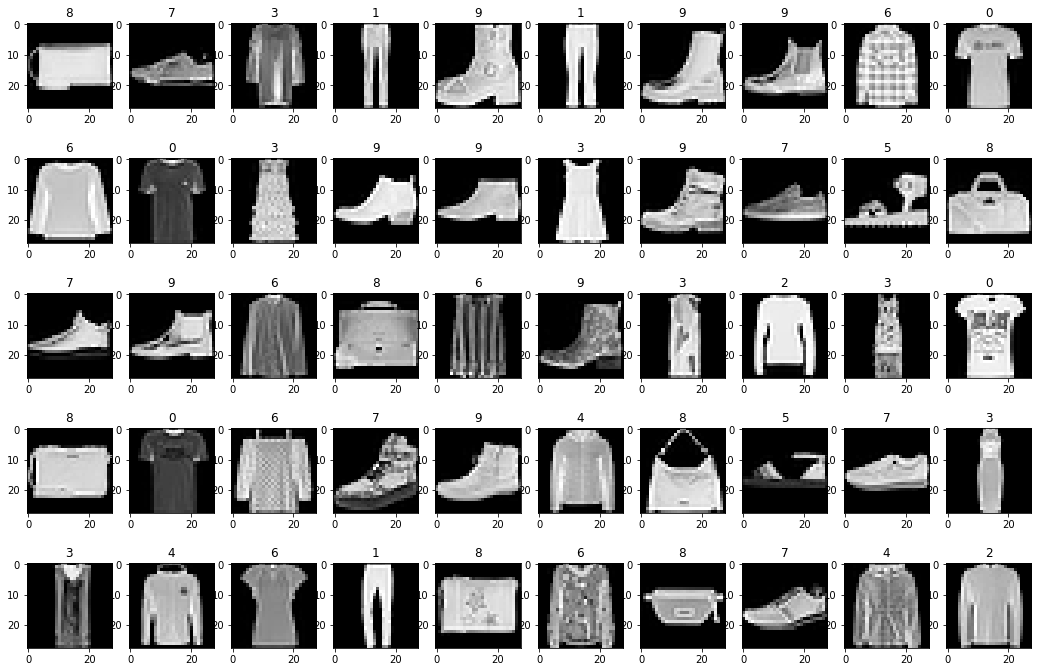

In [8]:
plot_random(shape=(5,10))

In [9]:
label_dict = {
    0: 'tshirt',
    1: 'trouser',
    2: 'pullover',
    3: 'dress',
    4: 'coat',
    5: 'sandal',
    6: 'shirt',
    7: 'sneaker',
    8: 'bag',
    9: 'boot'
}

In [10]:
def load_image_dataset(data, height=img_dim, width=img_dim):
    
    X, y = split_data_target(data)
    
    # formatting image data
    X = X.values.reshape(-1, height, width)
    
    # formatting image label
    y = y.values
    
    return X, y

In [11]:
X_train, y_train = load_image_dataset(train)
X_test, y_test = load_image_dataset(test)

In [12]:
# combining train-test data for better generation
X_combined = np.vstack([X_train, X_test])
y_combined = np.vstack([y_train.reshape(-1,1),
                        y_test.reshape(-1,1)]).reshape(-1)

In [13]:
input_classes = pd.Series(y_combined).nunique()

In [17]:
# Initializing ACGANs
fashion_acgan = ACGAN(img_dim, img_dim, img_channels,
                      input_classes)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 8, 8, 32)          0         
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8, 8, 32)          0         
__________

In [18]:
# Training
try:
    g_loss, d_loss = fashion_acgan.train(X_combined, y_combined,
                                    epochs=8000, batch_size=100,
                                    sample_interval=200)
except TypeError:
    None

D:\anaconda\envs\deep-work\lib\site-packages\keras\engine\training.py:479: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 3.263145, acc.: 42.50%, op_acc: 8.00%]                      [G loss: 3.253325
1 [D loss: 3.246536, acc.: 48.00%, op_acc: 14.00%]                      [G loss: 3.141407
2 [D loss: 3.187874, acc.: 49.00%, op_acc: 11.00%]                      [G loss: 3.182539
3 [D loss: 3.175971, acc.: 50.50%, op_acc: 12.50%]                      [G loss: 3.102397
4 [D loss: 3.093318, acc.: 51.00%, op_acc: 17.50%]                      [G loss: 3.173766
5 [D loss: 3.058022, acc.: 51.00%, op_acc: 12.00%]                      [G loss: 3.145884
6 [D loss: 3.152229, acc.: 48.00%, op_acc: 18.50%]                      [G loss: 3.122411
7 [D loss: 3.050611, acc.: 53.00%, op_acc: 15.00%]                      [G loss: 3.145242
8 [D loss: 3.114460, acc.: 49.00%, op_acc: 14.00%]                      [G loss: 3.147427
9 [D loss: 3.032097, acc.: 56.00%, op_acc: 15.00%]                      [G loss: 3.240509
10 [D loss: 3.110966, acc.: 47.50%, op_acc: 16.00%]                      [G loss: 3.251128
11 [D loss

93 [D loss: 2.208994, acc.: 48.00%, op_acc: 49.50%]                      [G loss: 2.507757
94 [D loss: 2.206548, acc.: 46.50%, op_acc: 43.00%]                      [G loss: 2.639987
95 [D loss: 2.270715, acc.: 46.00%, op_acc: 45.50%]                      [G loss: 2.582820
96 [D loss: 2.136453, acc.: 38.00%, op_acc: 52.50%]                      [G loss: 2.469011
97 [D loss: 2.247893, acc.: 39.00%, op_acc: 49.50%]                      [G loss: 2.497635
98 [D loss: 2.333213, acc.: 39.00%, op_acc: 49.00%]                      [G loss: 2.398157
99 [D loss: 2.226232, acc.: 40.50%, op_acc: 47.00%]                      [G loss: 2.391074
100 [D loss: 2.375400, acc.: 30.00%, op_acc: 46.00%]                      [G loss: 2.491477
101 [D loss: 2.297346, acc.: 36.50%, op_acc: 50.50%]                      [G loss: 2.535808
102 [D loss: 2.229613, acc.: 43.50%, op_acc: 42.00%]                      [G loss: 2.472641
103 [D loss: 2.178655, acc.: 35.50%, op_acc: 54.50%]                      [G loss: 2.33

183 [D loss: 1.525229, acc.: 62.00%, op_acc: 63.50%]                      [G loss: 2.164008
184 [D loss: 1.609452, acc.: 67.00%, op_acc: 62.50%]                      [G loss: 1.981014
185 [D loss: 1.577945, acc.: 56.50%, op_acc: 62.00%]                      [G loss: 1.958236
186 [D loss: 1.645738, acc.: 59.00%, op_acc: 60.00%]                      [G loss: 1.763897
187 [D loss: 1.641617, acc.: 53.00%, op_acc: 66.50%]                      [G loss: 1.659337
188 [D loss: 1.491745, acc.: 61.50%, op_acc: 68.50%]                      [G loss: 1.963669
189 [D loss: 1.546815, acc.: 60.50%, op_acc: 68.00%]                      [G loss: 1.816201
190 [D loss: 1.459505, acc.: 61.50%, op_acc: 71.50%]                      [G loss: 1.726194
191 [D loss: 1.537093, acc.: 54.50%, op_acc: 65.50%]                      [G loss: 1.647003
192 [D loss: 1.481553, acc.: 59.50%, op_acc: 69.00%]                      [G loss: 1.820791
193 [D loss: 1.671747, acc.: 49.00%, op_acc: 64.00%]                      [G los

273 [D loss: 1.292146, acc.: 55.50%, op_acc: 80.00%]                      [G loss: 1.193249
274 [D loss: 1.085084, acc.: 62.50%, op_acc: 86.50%]                      [G loss: 1.177090
275 [D loss: 1.282241, acc.: 55.00%, op_acc: 83.00%]                      [G loss: 1.136158
276 [D loss: 1.300262, acc.: 56.00%, op_acc: 80.50%]                      [G loss: 1.162184
277 [D loss: 1.310388, acc.: 58.50%, op_acc: 80.50%]                      [G loss: 1.140082
278 [D loss: 1.231955, acc.: 52.50%, op_acc: 82.50%]                      [G loss: 1.222561
279 [D loss: 1.112616, acc.: 56.50%, op_acc: 85.00%]                      [G loss: 1.200354
280 [D loss: 1.210544, acc.: 56.00%, op_acc: 81.00%]                      [G loss: 1.244622
281 [D loss: 1.319454, acc.: 57.00%, op_acc: 80.50%]                      [G loss: 1.168966
282 [D loss: 1.232685, acc.: 56.00%, op_acc: 81.50%]                      [G loss: 1.153688
283 [D loss: 1.186437, acc.: 58.50%, op_acc: 82.50%]                      [G los

363 [D loss: 1.189591, acc.: 48.50%, op_acc: 84.00%]                      [G loss: 0.944284
364 [D loss: 1.146313, acc.: 53.00%, op_acc: 87.50%]                      [G loss: 0.981336
365 [D loss: 1.258205, acc.: 58.00%, op_acc: 82.00%]                      [G loss: 1.108045
366 [D loss: 1.133697, acc.: 51.50%, op_acc: 87.50%]                      [G loss: 1.006388
367 [D loss: 1.094339, acc.: 61.50%, op_acc: 84.00%]                      [G loss: 1.068621
368 [D loss: 1.116758, acc.: 53.00%, op_acc: 85.50%]                      [G loss: 0.899818
369 [D loss: 1.155540, acc.: 57.00%, op_acc: 82.00%]                      [G loss: 0.943738
370 [D loss: 1.154474, acc.: 53.00%, op_acc: 83.50%]                      [G loss: 0.982738
371 [D loss: 1.146960, acc.: 60.00%, op_acc: 83.00%]                      [G loss: 0.975202
372 [D loss: 1.198240, acc.: 47.50%, op_acc: 85.00%]                      [G loss: 1.023394
373 [D loss: 1.085865, acc.: 51.50%, op_acc: 88.50%]                      [G los

454 [D loss: 1.072523, acc.: 58.50%, op_acc: 86.50%]                      [G loss: 1.022109
455 [D loss: 1.120382, acc.: 51.00%, op_acc: 85.50%]                      [G loss: 0.924907
456 [D loss: 1.116844, acc.: 58.50%, op_acc: 88.50%]                      [G loss: 1.018486
457 [D loss: 1.115345, acc.: 58.00%, op_acc: 85.50%]                      [G loss: 0.949785
458 [D loss: 1.210809, acc.: 53.00%, op_acc: 86.00%]                      [G loss: 0.881019
459 [D loss: 1.179148, acc.: 59.00%, op_acc: 88.00%]                      [G loss: 0.917109
460 [D loss: 1.085187, acc.: 53.50%, op_acc: 86.50%]                      [G loss: 0.893461
461 [D loss: 1.105875, acc.: 60.50%, op_acc: 85.50%]                      [G loss: 0.935108
462 [D loss: 1.118123, acc.: 48.00%, op_acc: 88.50%]                      [G loss: 0.974988
463 [D loss: 1.121773, acc.: 53.00%, op_acc: 88.00%]                      [G loss: 0.925676
464 [D loss: 1.228760, acc.: 53.50%, op_acc: 82.50%]                      [G los

546 [D loss: 1.048235, acc.: 55.50%, op_acc: 87.50%]                      [G loss: 0.957370
547 [D loss: 1.156163, acc.: 44.50%, op_acc: 86.50%]                      [G loss: 0.882100
548 [D loss: 1.137577, acc.: 48.50%, op_acc: 86.50%]                      [G loss: 0.915026
549 [D loss: 1.076479, acc.: 53.00%, op_acc: 87.50%]                      [G loss: 0.903982
550 [D loss: 1.070431, acc.: 50.50%, op_acc: 87.50%]                      [G loss: 0.923517
551 [D loss: 1.162977, acc.: 57.00%, op_acc: 83.00%]                      [G loss: 0.949509
552 [D loss: 1.110490, acc.: 53.50%, op_acc: 86.00%]                      [G loss: 0.954705
553 [D loss: 1.205274, acc.: 57.00%, op_acc: 82.50%]                      [G loss: 1.012110
554 [D loss: 1.051781, acc.: 51.50%, op_acc: 87.50%]                      [G loss: 0.973741
555 [D loss: 1.032770, acc.: 51.00%, op_acc: 88.50%]                      [G loss: 0.978720
556 [D loss: 1.049664, acc.: 56.50%, op_acc: 87.00%]                      [G los

637 [D loss: 1.065418, acc.: 54.00%, op_acc: 88.00%]                      [G loss: 0.877076
638 [D loss: 1.135641, acc.: 55.50%, op_acc: 85.00%]                      [G loss: 0.943690
639 [D loss: 1.102052, acc.: 54.50%, op_acc: 88.50%]                      [G loss: 0.933544
640 [D loss: 1.078172, acc.: 50.50%, op_acc: 86.00%]                      [G loss: 0.926538
641 [D loss: 1.154565, acc.: 44.50%, op_acc: 88.00%]                      [G loss: 0.859120
642 [D loss: 1.173209, acc.: 48.50%, op_acc: 83.00%]                      [G loss: 0.935710
643 [D loss: 1.081320, acc.: 49.00%, op_acc: 89.00%]                      [G loss: 0.885410
644 [D loss: 1.077458, acc.: 46.00%, op_acc: 87.50%]                      [G loss: 0.925082
645 [D loss: 1.123381, acc.: 52.00%, op_acc: 84.50%]                      [G loss: 0.918213
646 [D loss: 1.091898, acc.: 60.00%, op_acc: 83.00%]                      [G loss: 0.841041
647 [D loss: 1.014828, acc.: 54.50%, op_acc: 89.00%]                      [G los

729 [D loss: 1.102902, acc.: 51.50%, op_acc: 86.50%]                      [G loss: 0.884824
730 [D loss: 1.032609, acc.: 52.00%, op_acc: 90.00%]                      [G loss: 0.914944
731 [D loss: 1.077199, acc.: 50.00%, op_acc: 86.50%]                      [G loss: 0.861893
732 [D loss: 0.999991, acc.: 54.50%, op_acc: 90.00%]                      [G loss: 0.875839
733 [D loss: 1.144389, acc.: 52.50%, op_acc: 85.00%]                      [G loss: 0.888073
734 [D loss: 1.088555, acc.: 58.50%, op_acc: 86.00%]                      [G loss: 0.834210
735 [D loss: 1.111811, acc.: 55.00%, op_acc: 87.50%]                      [G loss: 0.896189
736 [D loss: 1.025688, acc.: 55.50%, op_acc: 90.50%]                      [G loss: 0.926899
737 [D loss: 1.022241, acc.: 54.00%, op_acc: 90.50%]                      [G loss: 0.897919
738 [D loss: 1.101774, acc.: 51.00%, op_acc: 88.00%]                      [G loss: 0.948162
739 [D loss: 1.009645, acc.: 63.00%, op_acc: 89.00%]                      [G los

819 [D loss: 1.004057, acc.: 57.00%, op_acc: 88.00%]                      [G loss: 0.839278
820 [D loss: 0.978789, acc.: 54.00%, op_acc: 90.50%]                      [G loss: 0.862774
821 [D loss: 0.974657, acc.: 59.00%, op_acc: 90.50%]                      [G loss: 0.859656
822 [D loss: 0.988113, acc.: 53.50%, op_acc: 89.00%]                      [G loss: 0.841626
823 [D loss: 1.025142, acc.: 63.50%, op_acc: 87.00%]                      [G loss: 0.846430
824 [D loss: 1.044870, acc.: 55.00%, op_acc: 87.50%]                      [G loss: 0.877835
825 [D loss: 1.055565, acc.: 50.50%, op_acc: 87.50%]                      [G loss: 0.851873
826 [D loss: 1.130980, acc.: 55.00%, op_acc: 85.00%]                      [G loss: 0.870455
827 [D loss: 1.053698, acc.: 54.00%, op_acc: 85.00%]                      [G loss: 0.864809
828 [D loss: 1.100900, acc.: 50.00%, op_acc: 88.50%]                      [G loss: 1.257424
829 [D loss: 1.021200, acc.: 51.50%, op_acc: 89.00%]                      [G los

909 [D loss: 1.089158, acc.: 53.00%, op_acc: 86.00%]                      [G loss: 0.836583
910 [D loss: 1.062528, acc.: 47.00%, op_acc: 87.50%]                      [G loss: 0.876136
911 [D loss: 1.042639, acc.: 50.00%, op_acc: 88.00%]                      [G loss: 0.827690
912 [D loss: 1.100517, acc.: 61.00%, op_acc: 88.00%]                      [G loss: 0.853237
913 [D loss: 0.915395, acc.: 46.00%, op_acc: 94.50%]                      [G loss: 0.861129
914 [D loss: 1.135613, acc.: 46.50%, op_acc: 86.00%]                      [G loss: 0.937018
915 [D loss: 1.054858, acc.: 54.00%, op_acc: 88.00%]                      [G loss: 0.910902
916 [D loss: 1.020365, acc.: 51.00%, op_acc: 89.00%]                      [G loss: 0.853391
917 [D loss: 1.004786, acc.: 49.50%, op_acc: 91.50%]                      [G loss: 0.857576
918 [D loss: 1.064306, acc.: 44.50%, op_acc: 90.00%]                      [G loss: 0.852417
919 [D loss: 1.050209, acc.: 49.00%, op_acc: 88.50%]                      [G los

999 [D loss: 1.049736, acc.: 52.50%, op_acc: 88.00%]                      [G loss: 0.876112
1000 [D loss: 1.090255, acc.: 49.50%, op_acc: 87.50%]                      [G loss: 0.854583
1001 [D loss: 0.995898, acc.: 53.00%, op_acc: 90.50%]                      [G loss: 0.779154
1002 [D loss: 1.044371, acc.: 47.50%, op_acc: 90.50%]                      [G loss: 0.863023
1003 [D loss: 1.142388, acc.: 45.00%, op_acc: 86.00%]                      [G loss: 0.852446
1004 [D loss: 1.063874, acc.: 55.00%, op_acc: 86.50%]                      [G loss: 0.893321
1005 [D loss: 1.003832, acc.: 51.50%, op_acc: 88.00%]                      [G loss: 0.846362
1006 [D loss: 1.017207, acc.: 51.00%, op_acc: 87.00%]                      [G loss: 0.794360
1007 [D loss: 0.983226, acc.: 56.00%, op_acc: 88.50%]                      [G loss: 0.843003
1008 [D loss: 0.952694, acc.: 46.50%, op_acc: 93.00%]                      [G loss: 0.836819
1009 [D loss: 1.021142, acc.: 55.00%, op_acc: 89.50%]                  

1088 [D loss: 0.991533, acc.: 56.50%, op_acc: 90.50%]                      [G loss: 0.864387
1089 [D loss: 0.994445, acc.: 51.50%, op_acc: 91.00%]                      [G loss: 0.856351
1090 [D loss: 0.964525, acc.: 59.00%, op_acc: 88.00%]                      [G loss: 0.906396
1091 [D loss: 0.981623, acc.: 58.50%, op_acc: 89.00%]                      [G loss: 0.824872
1092 [D loss: 1.013627, acc.: 52.50%, op_acc: 89.50%]                      [G loss: 0.864168
1093 [D loss: 0.923892, acc.: 54.50%, op_acc: 91.50%]                      [G loss: 0.811891
1094 [D loss: 1.055661, acc.: 51.00%, op_acc: 87.50%]                      [G loss: 0.818125
1095 [D loss: 1.048410, acc.: 51.00%, op_acc: 87.50%]                      [G loss: 0.843834
1096 [D loss: 1.026795, acc.: 45.00%, op_acc: 90.50%]                      [G loss: 0.829235
1097 [D loss: 1.019461, acc.: 51.00%, op_acc: 89.00%]                      [G loss: 0.853247
1098 [D loss: 0.991347, acc.: 53.00%, op_acc: 89.00%]                 

1178 [D loss: 1.068455, acc.: 46.00%, op_acc: 88.00%]                      [G loss: 0.909296
1179 [D loss: 0.998085, acc.: 53.00%, op_acc: 91.00%]                      [G loss: 0.947915
1180 [D loss: 1.246249, acc.: 50.50%, op_acc: 82.00%]                      [G loss: 1.106312
1181 [D loss: 0.961187, acc.: 53.50%, op_acc: 91.50%]                      [G loss: 0.887385
1182 [D loss: 0.997004, acc.: 57.50%, op_acc: 91.00%]                      [G loss: 0.932377
1183 [D loss: 1.087770, acc.: 55.00%, op_acc: 87.00%]                      [G loss: 0.810539
1184 [D loss: 0.982369, acc.: 56.00%, op_acc: 88.50%]                      [G loss: 0.904454
1185 [D loss: 0.991950, acc.: 57.50%, op_acc: 88.00%]                      [G loss: 0.902294
1186 [D loss: 0.996066, acc.: 56.00%, op_acc: 85.50%]                      [G loss: 0.798509
1187 [D loss: 0.996390, acc.: 52.00%, op_acc: 91.00%]                      [G loss: 0.836060
1188 [D loss: 1.129802, acc.: 56.00%, op_acc: 85.00%]                 

1267 [D loss: 0.993936, acc.: 60.00%, op_acc: 88.50%]                      [G loss: 0.821794
1268 [D loss: 1.039689, acc.: 56.00%, op_acc: 89.50%]                      [G loss: 0.796271
1269 [D loss: 0.897757, acc.: 53.50%, op_acc: 94.50%]                      [G loss: 0.826436
1270 [D loss: 1.000785, acc.: 57.00%, op_acc: 89.50%]                      [G loss: 0.803585
1271 [D loss: 1.004468, acc.: 55.00%, op_acc: 89.50%]                      [G loss: 0.873540
1272 [D loss: 1.024437, acc.: 60.00%, op_acc: 89.00%]                      [G loss: 0.819099
1273 [D loss: 1.053498, acc.: 53.50%, op_acc: 88.50%]                      [G loss: 0.788734
1274 [D loss: 0.987067, acc.: 47.50%, op_acc: 89.50%]                      [G loss: 0.824784
1275 [D loss: 1.103640, acc.: 50.00%, op_acc: 89.00%]                      [G loss: 0.832262
1276 [D loss: 1.064325, acc.: 51.50%, op_acc: 89.50%]                      [G loss: 0.817557
1277 [D loss: 0.974370, acc.: 59.00%, op_acc: 89.50%]                 

1357 [D loss: 1.068738, acc.: 56.50%, op_acc: 85.50%]                      [G loss: 0.798490
1358 [D loss: 0.960722, acc.: 55.00%, op_acc: 91.50%]                      [G loss: 0.919195
1359 [D loss: 1.055094, acc.: 53.00%, op_acc: 87.50%]                      [G loss: 0.815173
1360 [D loss: 0.897312, acc.: 53.50%, op_acc: 94.00%]                      [G loss: 0.808500
1361 [D loss: 1.049013, acc.: 52.50%, op_acc: 90.00%]                      [G loss: 0.871984
1362 [D loss: 1.017146, acc.: 57.00%, op_acc: 89.50%]                      [G loss: 0.832812
1363 [D loss: 1.025414, acc.: 57.50%, op_acc: 89.50%]                      [G loss: 0.832586
1364 [D loss: 0.989290, acc.: 47.50%, op_acc: 91.50%]                      [G loss: 0.812498
1365 [D loss: 1.001688, acc.: 45.00%, op_acc: 91.00%]                      [G loss: 0.823287
1366 [D loss: 1.015773, acc.: 53.00%, op_acc: 90.50%]                      [G loss: 0.868280
1367 [D loss: 0.981144, acc.: 47.50%, op_acc: 94.00%]                 

1446 [D loss: 0.947279, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.831368
1447 [D loss: 0.945445, acc.: 51.00%, op_acc: 93.50%]                      [G loss: 0.845280
1448 [D loss: 0.925023, acc.: 52.50%, op_acc: 93.50%]                      [G loss: 0.822029
1449 [D loss: 0.953669, acc.: 50.00%, op_acc: 92.00%]                      [G loss: 0.788382
1450 [D loss: 0.943694, acc.: 50.00%, op_acc: 93.00%]                      [G loss: 0.837747
1451 [D loss: 0.999948, acc.: 47.50%, op_acc: 91.50%]                      [G loss: 0.781149
1452 [D loss: 0.999303, acc.: 47.50%, op_acc: 91.00%]                      [G loss: 0.804561
1453 [D loss: 1.136571, acc.: 45.50%, op_acc: 87.00%]                      [G loss: 0.796780
1454 [D loss: 1.013227, acc.: 50.00%, op_acc: 89.00%]                      [G loss: 0.789609
1455 [D loss: 1.037664, acc.: 56.00%, op_acc: 87.50%]                      [G loss: 0.790730
1456 [D loss: 1.086442, acc.: 46.00%, op_acc: 88.00%]                 

1536 [D loss: 1.066348, acc.: 44.50%, op_acc: 90.00%]                      [G loss: 0.756865
1537 [D loss: 0.918999, acc.: 51.50%, op_acc: 94.00%]                      [G loss: 0.785883
1538 [D loss: 0.907805, acc.: 51.50%, op_acc: 94.00%]                      [G loss: 0.780679
1539 [D loss: 0.902365, acc.: 50.50%, op_acc: 94.00%]                      [G loss: 0.771987
1540 [D loss: 0.999399, acc.: 51.50%, op_acc: 90.00%]                      [G loss: 0.794111
1541 [D loss: 1.050039, acc.: 45.00%, op_acc: 90.00%]                      [G loss: 0.828883
1542 [D loss: 1.003164, acc.: 48.50%, op_acc: 91.00%]                      [G loss: 0.835717
1543 [D loss: 1.012712, acc.: 48.50%, op_acc: 88.00%]                      [G loss: 0.815711
1544 [D loss: 1.010715, acc.: 52.00%, op_acc: 87.50%]                      [G loss: 0.768635
1545 [D loss: 0.962329, acc.: 42.50%, op_acc: 92.50%]                      [G loss: 0.798322
1546 [D loss: 1.038751, acc.: 45.50%, op_acc: 89.00%]                 

1625 [D loss: 0.935541, acc.: 50.00%, op_acc: 90.50%]                      [G loss: 0.814757
1626 [D loss: 1.044024, acc.: 53.50%, op_acc: 89.50%]                      [G loss: 0.803908
1627 [D loss: 0.960412, acc.: 50.00%, op_acc: 91.00%]                      [G loss: 0.829766
1628 [D loss: 0.928435, acc.: 46.50%, op_acc: 93.00%]                      [G loss: 0.818061
1629 [D loss: 1.027027, acc.: 50.00%, op_acc: 90.00%]                      [G loss: 0.799943
1630 [D loss: 1.061826, acc.: 47.50%, op_acc: 91.00%]                      [G loss: 0.764670
1631 [D loss: 0.949438, acc.: 48.00%, op_acc: 91.50%]                      [G loss: 0.780275
1632 [D loss: 0.958065, acc.: 47.50%, op_acc: 94.50%]                      [G loss: 0.808738
1633 [D loss: 1.055406, acc.: 48.00%, op_acc: 89.00%]                      [G loss: 0.782872
1634 [D loss: 1.038707, acc.: 47.00%, op_acc: 89.00%]                      [G loss: 0.727760
1635 [D loss: 1.019942, acc.: 48.50%, op_acc: 89.00%]                 

1715 [D loss: 0.985115, acc.: 43.50%, op_acc: 90.00%]                      [G loss: 0.766156
1716 [D loss: 0.915507, acc.: 48.00%, op_acc: 93.00%]                      [G loss: 0.777514
1717 [D loss: 0.939304, acc.: 51.50%, op_acc: 93.00%]                      [G loss: 0.781592
1718 [D loss: 1.007722, acc.: 54.00%, op_acc: 89.50%]                      [G loss: 0.788638
1719 [D loss: 1.050668, acc.: 46.50%, op_acc: 90.00%]                      [G loss: 0.787286
1720 [D loss: 1.032806, acc.: 44.50%, op_acc: 90.50%]                      [G loss: 0.800431
1721 [D loss: 0.991214, acc.: 43.50%, op_acc: 91.00%]                      [G loss: 0.810886
1722 [D loss: 0.988703, acc.: 51.00%, op_acc: 90.50%]                      [G loss: 0.806403
1723 [D loss: 0.982765, acc.: 50.50%, op_acc: 90.00%]                      [G loss: 0.815146
1724 [D loss: 1.106232, acc.: 47.50%, op_acc: 89.50%]                      [G loss: 0.831964
1725 [D loss: 0.949712, acc.: 50.00%, op_acc: 92.00%]                 

1804 [D loss: 1.014186, acc.: 47.00%, op_acc: 91.00%]                      [G loss: 0.830839
1805 [D loss: 1.006303, acc.: 48.50%, op_acc: 88.00%]                      [G loss: 0.808813
1806 [D loss: 1.000083, acc.: 46.00%, op_acc: 89.50%]                      [G loss: 0.810484
1807 [D loss: 0.998501, acc.: 46.00%, op_acc: 90.00%]                      [G loss: 0.789412
1808 [D loss: 0.958948, acc.: 48.00%, op_acc: 90.50%]                      [G loss: 0.756671
1809 [D loss: 1.037587, acc.: 56.00%, op_acc: 87.50%]                      [G loss: 0.790701
1810 [D loss: 1.101598, acc.: 44.50%, op_acc: 86.50%]                      [G loss: 0.826810
1811 [D loss: 0.959239, acc.: 42.50%, op_acc: 93.50%]                      [G loss: 0.829468
1812 [D loss: 0.978407, acc.: 50.00%, op_acc: 91.00%]                      [G loss: 0.823103
1813 [D loss: 1.058439, acc.: 52.00%, op_acc: 89.50%]                      [G loss: 0.825399
1814 [D loss: 1.003152, acc.: 47.50%, op_acc: 90.00%]                 

1894 [D loss: 0.924802, acc.: 49.00%, op_acc: 93.50%]                      [G loss: 0.780022
1895 [D loss: 0.980102, acc.: 52.50%, op_acc: 91.50%]                      [G loss: 0.755616
1896 [D loss: 1.062373, acc.: 53.50%, op_acc: 89.00%]                      [G loss: 0.799874
1897 [D loss: 0.900933, acc.: 54.50%, op_acc: 94.00%]                      [G loss: 0.798857
1898 [D loss: 1.022569, acc.: 53.50%, op_acc: 87.50%]                      [G loss: 0.774203
1899 [D loss: 1.089030, acc.: 47.50%, op_acc: 89.00%]                      [G loss: 0.771955
1900 [D loss: 1.003574, acc.: 49.50%, op_acc: 88.50%]                      [G loss: 0.825452
1901 [D loss: 1.100465, acc.: 41.50%, op_acc: 88.00%]                      [G loss: 0.802676
1902 [D loss: 1.021084, acc.: 47.00%, op_acc: 90.00%]                      [G loss: 0.773292
1903 [D loss: 0.928009, acc.: 46.00%, op_acc: 91.50%]                      [G loss: 0.764998
1904 [D loss: 0.944279, acc.: 52.00%, op_acc: 90.50%]                 

1984 [D loss: 0.905268, acc.: 53.50%, op_acc: 92.50%]                      [G loss: 0.810787
1985 [D loss: 0.955318, acc.: 53.00%, op_acc: 90.50%]                      [G loss: 0.819830
1986 [D loss: 1.005843, acc.: 50.00%, op_acc: 90.50%]                      [G loss: 0.797764
1987 [D loss: 0.941275, acc.: 49.00%, op_acc: 91.50%]                      [G loss: 0.797879
1988 [D loss: 0.949859, acc.: 46.50%, op_acc: 91.50%]                      [G loss: 0.778037
1989 [D loss: 0.960300, acc.: 40.00%, op_acc: 93.50%]                      [G loss: 0.795876
1990 [D loss: 1.030840, acc.: 42.00%, op_acc: 87.00%]                      [G loss: 0.807098
1991 [D loss: 0.945095, acc.: 51.00%, op_acc: 91.50%]                      [G loss: 0.764238
1992 [D loss: 0.977719, acc.: 46.50%, op_acc: 88.50%]                      [G loss: 0.784696
1993 [D loss: 0.958945, acc.: 46.00%, op_acc: 93.00%]                      [G loss: 0.778291
1994 [D loss: 1.009838, acc.: 43.00%, op_acc: 90.50%]                 

2073 [D loss: 0.994295, acc.: 51.50%, op_acc: 91.50%]                      [G loss: 0.763343
2074 [D loss: 0.971395, acc.: 55.50%, op_acc: 91.50%]                      [G loss: 0.810890
2075 [D loss: 0.915981, acc.: 40.50%, op_acc: 93.50%]                      [G loss: 0.759946
2076 [D loss: 0.957722, acc.: 50.00%, op_acc: 94.00%]                      [G loss: 0.747501
2077 [D loss: 0.983499, acc.: 53.00%, op_acc: 87.00%]                      [G loss: 0.786142
2078 [D loss: 0.838569, acc.: 51.50%, op_acc: 95.00%]                      [G loss: 0.773192
2079 [D loss: 1.088759, acc.: 54.50%, op_acc: 89.50%]                      [G loss: 0.787439
2080 [D loss: 0.931926, acc.: 44.00%, op_acc: 92.00%]                      [G loss: 0.747351
2081 [D loss: 0.999502, acc.: 50.50%, op_acc: 90.50%]                      [G loss: 0.759037
2082 [D loss: 0.888385, acc.: 56.50%, op_acc: 93.00%]                      [G loss: 0.738574
2083 [D loss: 1.040674, acc.: 48.50%, op_acc: 88.00%]                 

2163 [D loss: 1.068322, acc.: 46.50%, op_acc: 91.00%]                      [G loss: 0.729817
2164 [D loss: 0.986337, acc.: 42.00%, op_acc: 90.00%]                      [G loss: 0.756984
2165 [D loss: 0.926087, acc.: 49.00%, op_acc: 92.50%]                      [G loss: 0.770475
2166 [D loss: 0.923689, acc.: 48.00%, op_acc: 93.50%]                      [G loss: 0.771666
2167 [D loss: 1.069824, acc.: 48.00%, op_acc: 89.50%]                      [G loss: 0.760403
2168 [D loss: 0.977149, acc.: 51.50%, op_acc: 91.50%]                      [G loss: 0.801207
2169 [D loss: 0.970626, acc.: 43.50%, op_acc: 91.50%]                      [G loss: 0.777573
2170 [D loss: 1.003556, acc.: 47.50%, op_acc: 91.00%]                      [G loss: 0.776572
2171 [D loss: 1.009906, acc.: 53.50%, op_acc: 88.00%]                      [G loss: 0.783805
2172 [D loss: 1.017715, acc.: 50.00%, op_acc: 88.50%]                      [G loss: 0.787449
2173 [D loss: 0.983036, acc.: 45.00%, op_acc: 89.50%]                 

2252 [D loss: 1.029874, acc.: 51.00%, op_acc: 89.50%]                      [G loss: 0.780748
2253 [D loss: 0.972797, acc.: 55.00%, op_acc: 91.00%]                      [G loss: 0.786651
2254 [D loss: 0.898989, acc.: 60.50%, op_acc: 92.00%]                      [G loss: 0.781438
2255 [D loss: 0.917340, acc.: 53.50%, op_acc: 92.00%]                      [G loss: 0.774022
2256 [D loss: 1.008759, acc.: 44.50%, op_acc: 90.50%]                      [G loss: 0.774323
2257 [D loss: 0.942843, acc.: 50.00%, op_acc: 92.50%]                      [G loss: 0.748119
2258 [D loss: 0.953956, acc.: 48.50%, op_acc: 92.00%]                      [G loss: 0.754971
2259 [D loss: 0.895417, acc.: 45.00%, op_acc: 94.00%]                      [G loss: 0.760574
2260 [D loss: 1.059796, acc.: 42.50%, op_acc: 91.50%]                      [G loss: 0.772939
2261 [D loss: 0.964938, acc.: 51.00%, op_acc: 91.50%]                      [G loss: 0.781298
2262 [D loss: 0.952747, acc.: 46.50%, op_acc: 92.00%]                 

2342 [D loss: 1.032138, acc.: 52.00%, op_acc: 87.00%]                      [G loss: 0.761376
2343 [D loss: 0.973584, acc.: 53.00%, op_acc: 90.00%]                      [G loss: 0.770964
2344 [D loss: 0.918121, acc.: 41.50%, op_acc: 94.00%]                      [G loss: 0.776408
2345 [D loss: 1.040362, acc.: 47.00%, op_acc: 91.00%]                      [G loss: 0.786234
2346 [D loss: 0.878390, acc.: 53.50%, op_acc: 94.00%]                      [G loss: 0.819102
2347 [D loss: 0.918656, acc.: 48.00%, op_acc: 93.50%]                      [G loss: 0.754158
2348 [D loss: 0.900569, acc.: 50.00%, op_acc: 92.50%]                      [G loss: 0.782145
2349 [D loss: 0.968604, acc.: 47.50%, op_acc: 91.00%]                      [G loss: 0.801432
2350 [D loss: 0.995155, acc.: 53.00%, op_acc: 91.00%]                      [G loss: 0.779851
2351 [D loss: 1.013103, acc.: 46.00%, op_acc: 90.00%]                      [G loss: 0.853936
2352 [D loss: 1.033569, acc.: 47.00%, op_acc: 87.00%]                 

2431 [D loss: 0.977704, acc.: 47.50%, op_acc: 90.50%]                      [G loss: 0.743614
2432 [D loss: 1.036741, acc.: 42.50%, op_acc: 89.50%]                      [G loss: 0.733523
2433 [D loss: 1.056702, acc.: 54.00%, op_acc: 88.00%]                      [G loss: 0.760903
2434 [D loss: 0.927095, acc.: 47.50%, op_acc: 93.50%]                      [G loss: 0.768668
2435 [D loss: 0.947052, acc.: 42.00%, op_acc: 92.50%]                      [G loss: 0.762227
2436 [D loss: 0.904317, acc.: 51.50%, op_acc: 92.00%]                      [G loss: 0.781491
2437 [D loss: 0.900213, acc.: 53.50%, op_acc: 92.00%]                      [G loss: 0.769162
2438 [D loss: 1.015700, acc.: 47.00%, op_acc: 89.50%]                      [G loss: 0.792589
2439 [D loss: 0.996688, acc.: 45.50%, op_acc: 90.50%]                      [G loss: 0.745183
2440 [D loss: 0.919544, acc.: 44.50%, op_acc: 93.50%]                      [G loss: 0.780959
2441 [D loss: 0.924841, acc.: 47.00%, op_acc: 91.50%]                 

2521 [D loss: 0.955532, acc.: 56.50%, op_acc: 91.00%]                      [G loss: 0.794181
2522 [D loss: 0.979786, acc.: 52.50%, op_acc: 89.50%]                      [G loss: 0.778110
2523 [D loss: 0.950678, acc.: 49.00%, op_acc: 93.00%]                      [G loss: 0.769563
2524 [D loss: 0.869556, acc.: 52.00%, op_acc: 92.50%]                      [G loss: 0.773648
2525 [D loss: 0.931507, acc.: 54.50%, op_acc: 92.00%]                      [G loss: 0.784498
2526 [D loss: 0.996312, acc.: 46.50%, op_acc: 89.00%]                      [G loss: 0.791513
2527 [D loss: 0.989203, acc.: 50.50%, op_acc: 90.50%]                      [G loss: 0.751471
2528 [D loss: 1.029326, acc.: 46.00%, op_acc: 89.50%]                      [G loss: 0.776748
2529 [D loss: 0.950787, acc.: 53.00%, op_acc: 93.00%]                      [G loss: 0.771143
2530 [D loss: 0.914748, acc.: 50.50%, op_acc: 93.50%]                      [G loss: 0.775498
2531 [D loss: 0.955450, acc.: 45.00%, op_acc: 93.00%]                 

2610 [D loss: 0.954943, acc.: 46.50%, op_acc: 91.00%]                      [G loss: 0.806591
2611 [D loss: 0.977593, acc.: 48.00%, op_acc: 89.00%]                      [G loss: 0.743510
2612 [D loss: 0.917379, acc.: 48.50%, op_acc: 92.50%]                      [G loss: 0.763079
2613 [D loss: 0.942312, acc.: 47.00%, op_acc: 92.50%]                      [G loss: 0.812898
2614 [D loss: 0.926288, acc.: 51.50%, op_acc: 92.00%]                      [G loss: 0.752964
2615 [D loss: 0.871441, acc.: 48.50%, op_acc: 95.00%]                      [G loss: 0.758266
2616 [D loss: 0.936632, acc.: 53.00%, op_acc: 91.00%]                      [G loss: 0.777029
2617 [D loss: 1.050969, acc.: 44.00%, op_acc: 89.50%]                      [G loss: 0.719530
2618 [D loss: 1.037684, acc.: 50.00%, op_acc: 89.50%]                      [G loss: 0.767474
2619 [D loss: 0.896468, acc.: 41.50%, op_acc: 92.50%]                      [G loss: 0.789910
2620 [D loss: 0.879820, acc.: 45.00%, op_acc: 94.50%]                 

2700 [D loss: 0.978876, acc.: 50.50%, op_acc: 90.50%]                      [G loss: 0.751603
2701 [D loss: 0.951039, acc.: 51.00%, op_acc: 92.00%]                      [G loss: 0.800487
2702 [D loss: 0.947898, acc.: 46.00%, op_acc: 92.50%]                      [G loss: 0.741717
2703 [D loss: 0.922205, acc.: 51.50%, op_acc: 93.50%]                      [G loss: 0.781505
2704 [D loss: 1.004282, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.775481
2705 [D loss: 0.948915, acc.: 59.00%, op_acc: 90.00%]                      [G loss: 0.743569
2706 [D loss: 0.958688, acc.: 51.50%, op_acc: 89.00%]                      [G loss: 0.755587
2707 [D loss: 0.874247, acc.: 55.50%, op_acc: 94.00%]                      [G loss: 0.754701
2708 [D loss: 0.848297, acc.: 52.50%, op_acc: 94.50%]                      [G loss: 0.740734
2709 [D loss: 1.011942, acc.: 49.50%, op_acc: 89.50%]                      [G loss: 0.735094
2710 [D loss: 0.920961, acc.: 46.50%, op_acc: 93.50%]                 

2790 [D loss: 0.976721, acc.: 49.00%, op_acc: 90.00%]                      [G loss: 0.770537
2791 [D loss: 0.950533, acc.: 45.00%, op_acc: 92.50%]                      [G loss: 0.763341
2792 [D loss: 0.920781, acc.: 51.50%, op_acc: 94.00%]                      [G loss: 0.724896
2793 [D loss: 0.966923, acc.: 43.00%, op_acc: 90.00%]                      [G loss: 0.733244
2794 [D loss: 0.911275, acc.: 51.00%, op_acc: 94.00%]                      [G loss: 0.760304
2795 [D loss: 1.048537, acc.: 44.00%, op_acc: 90.50%]                      [G loss: 0.740844
2796 [D loss: 0.942968, acc.: 45.00%, op_acc: 92.00%]                      [G loss: 0.740214
2797 [D loss: 0.902563, acc.: 45.50%, op_acc: 92.00%]                      [G loss: 0.763177
2798 [D loss: 0.984180, acc.: 46.00%, op_acc: 90.50%]                      [G loss: 0.736513
2799 [D loss: 0.955230, acc.: 53.50%, op_acc: 91.00%]                      [G loss: 0.764227
2800 [D loss: 0.936381, acc.: 50.00%, op_acc: 90.50%]                 

2879 [D loss: 0.912380, acc.: 51.00%, op_acc: 93.50%]                      [G loss: 0.806807
2880 [D loss: 0.980470, acc.: 47.00%, op_acc: 90.50%]                      [G loss: 0.768992
2881 [D loss: 0.934927, acc.: 51.50%, op_acc: 91.50%]                      [G loss: 0.797207
2882 [D loss: 0.925073, acc.: 49.50%, op_acc: 92.50%]                      [G loss: 0.749414
2883 [D loss: 0.885744, acc.: 53.00%, op_acc: 94.50%]                      [G loss: 0.778488
2884 [D loss: 0.911782, acc.: 54.00%, op_acc: 91.00%]                      [G loss: 0.812946
2885 [D loss: 0.916831, acc.: 50.00%, op_acc: 93.50%]                      [G loss: 0.790885
2886 [D loss: 0.861188, acc.: 50.00%, op_acc: 94.00%]                      [G loss: 0.771229
2887 [D loss: 0.973854, acc.: 55.50%, op_acc: 89.00%]                      [G loss: 0.801952
2888 [D loss: 0.980386, acc.: 44.50%, op_acc: 90.00%]                      [G loss: 0.772912
2889 [D loss: 0.967604, acc.: 56.00%, op_acc: 91.50%]                 

2970 [D loss: 0.977686, acc.: 42.00%, op_acc: 91.50%]                      [G loss: 0.753843
2971 [D loss: 0.862609, acc.: 44.50%, op_acc: 96.50%]                      [G loss: 0.755438
2972 [D loss: 0.872403, acc.: 51.00%, op_acc: 94.50%]                      [G loss: 0.770140
2973 [D loss: 0.855711, acc.: 50.00%, op_acc: 93.00%]                      [G loss: 0.757837
2974 [D loss: 1.002117, acc.: 50.50%, op_acc: 91.00%]                      [G loss: 0.752240
2975 [D loss: 0.878211, acc.: 49.00%, op_acc: 94.00%]                      [G loss: 0.745524
2976 [D loss: 1.042072, acc.: 47.50%, op_acc: 90.00%]                      [G loss: 0.747510
2977 [D loss: 0.987503, acc.: 45.50%, op_acc: 90.50%]                      [G loss: 0.783019
2978 [D loss: 0.896422, acc.: 53.00%, op_acc: 93.00%]                      [G loss: 0.768341
2979 [D loss: 1.034789, acc.: 48.00%, op_acc: 88.00%]                      [G loss: 0.739137
2980 [D loss: 0.875260, acc.: 50.00%, op_acc: 95.00%]                 

3061 [D loss: 0.898680, acc.: 42.50%, op_acc: 93.50%]                      [G loss: 0.735627
3062 [D loss: 0.976032, acc.: 44.50%, op_acc: 90.00%]                      [G loss: 0.745430
3063 [D loss: 0.893077, acc.: 54.00%, op_acc: 92.50%]                      [G loss: 0.768405
3064 [D loss: 0.915744, acc.: 48.00%, op_acc: 93.00%]                      [G loss: 0.751880
3065 [D loss: 0.953250, acc.: 36.00%, op_acc: 91.00%]                      [G loss: 0.751361
3066 [D loss: 1.108920, acc.: 52.00%, op_acc: 89.00%]                      [G loss: 0.740421
3067 [D loss: 0.926959, acc.: 44.00%, op_acc: 93.50%]                      [G loss: 0.760468
3068 [D loss: 0.939766, acc.: 48.50%, op_acc: 91.50%]                      [G loss: 0.743639
3069 [D loss: 0.913394, acc.: 42.50%, op_acc: 94.00%]                      [G loss: 0.721548
3070 [D loss: 0.871415, acc.: 57.50%, op_acc: 91.00%]                      [G loss: 0.763294
3071 [D loss: 0.838746, acc.: 51.00%, op_acc: 95.00%]                 

3151 [D loss: 0.839613, acc.: 46.00%, op_acc: 97.00%]                      [G loss: 0.719149
3152 [D loss: 0.967852, acc.: 39.00%, op_acc: 92.50%]                      [G loss: 0.758455
3153 [D loss: 0.855164, acc.: 54.00%, op_acc: 96.00%]                      [G loss: 0.722681
3154 [D loss: 0.934560, acc.: 50.00%, op_acc: 90.50%]                      [G loss: 0.745418
3155 [D loss: 0.875147, acc.: 45.50%, op_acc: 93.50%]                      [G loss: 0.753072
3156 [D loss: 0.997414, acc.: 45.50%, op_acc: 90.00%]                      [G loss: 0.737868
3157 [D loss: 0.913766, acc.: 52.00%, op_acc: 92.50%]                      [G loss: 0.745064
3158 [D loss: 0.962185, acc.: 44.00%, op_acc: 89.50%]                      [G loss: 0.699488
3159 [D loss: 0.914267, acc.: 45.50%, op_acc: 93.00%]                      [G loss: 0.728214
3160 [D loss: 0.859269, acc.: 46.00%, op_acc: 95.00%]                      [G loss: 0.735369
3161 [D loss: 0.980485, acc.: 45.50%, op_acc: 93.50%]                 

3240 [D loss: 0.986995, acc.: 47.00%, op_acc: 91.00%]                      [G loss: 0.747368
3241 [D loss: 1.006137, acc.: 46.00%, op_acc: 92.50%]                      [G loss: 0.769807
3242 [D loss: 1.037854, acc.: 49.50%, op_acc: 90.50%]                      [G loss: 0.743619
3243 [D loss: 0.924862, acc.: 45.00%, op_acc: 92.00%]                      [G loss: 0.736104
3244 [D loss: 0.930791, acc.: 45.00%, op_acc: 91.50%]                      [G loss: 0.730032
3245 [D loss: 0.915563, acc.: 48.50%, op_acc: 92.00%]                      [G loss: 0.778285
3246 [D loss: 1.043329, acc.: 47.00%, op_acc: 91.00%]                      [G loss: 0.763642
3247 [D loss: 0.923800, acc.: 52.50%, op_acc: 93.00%]                      [G loss: 0.755467
3248 [D loss: 1.015364, acc.: 48.50%, op_acc: 90.50%]                      [G loss: 0.739605
3249 [D loss: 0.887313, acc.: 49.00%, op_acc: 94.50%]                      [G loss: 0.765957
3250 [D loss: 1.005578, acc.: 44.00%, op_acc: 89.00%]                 

3330 [D loss: 0.918742, acc.: 42.50%, op_acc: 93.50%]                      [G loss: 0.742335
3331 [D loss: 0.892176, acc.: 47.00%, op_acc: 94.50%]                      [G loss: 0.756249
3332 [D loss: 0.947894, acc.: 51.50%, op_acc: 90.50%]                      [G loss: 0.751834
3333 [D loss: 0.896195, acc.: 49.50%, op_acc: 93.00%]                      [G loss: 0.781807
3334 [D loss: 0.942625, acc.: 50.50%, op_acc: 93.00%]                      [G loss: 0.739874
3335 [D loss: 0.875123, acc.: 50.00%, op_acc: 94.00%]                      [G loss: 0.779427
3336 [D loss: 0.910072, acc.: 50.50%, op_acc: 93.00%]                      [G loss: 0.738945
3337 [D loss: 0.894505, acc.: 47.50%, op_acc: 92.50%]                      [G loss: 0.728845
3338 [D loss: 0.919980, acc.: 45.00%, op_acc: 93.00%]                      [G loss: 0.731212
3339 [D loss: 0.972202, acc.: 44.00%, op_acc: 90.00%]                      [G loss: 0.753009
3340 [D loss: 0.905281, acc.: 44.00%, op_acc: 93.00%]                 

3419 [D loss: 0.938060, acc.: 53.50%, op_acc: 91.00%]                      [G loss: 0.715665
3420 [D loss: 0.827760, acc.: 51.00%, op_acc: 95.50%]                      [G loss: 0.750678
3421 [D loss: 0.887691, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.739423
3422 [D loss: 0.982455, acc.: 44.00%, op_acc: 91.50%]                      [G loss: 0.746428
3423 [D loss: 0.867498, acc.: 56.00%, op_acc: 92.50%]                      [G loss: 0.764973
3424 [D loss: 0.914834, acc.: 52.50%, op_acc: 93.00%]                      [G loss: 0.826482
3425 [D loss: 0.974952, acc.: 45.00%, op_acc: 90.00%]                      [G loss: 0.782015
3426 [D loss: 0.942895, acc.: 43.50%, op_acc: 91.00%]                      [G loss: 0.768775
3427 [D loss: 1.027875, acc.: 51.50%, op_acc: 87.50%]                      [G loss: 0.772896
3428 [D loss: 0.959624, acc.: 56.00%, op_acc: 94.00%]                      [G loss: 0.755517
3429 [D loss: 0.891601, acc.: 51.00%, op_acc: 95.00%]                 

3509 [D loss: 0.955862, acc.: 51.00%, op_acc: 90.00%]                      [G loss: 0.729986
3510 [D loss: 0.919703, acc.: 45.50%, op_acc: 94.00%]                      [G loss: 0.744297
3511 [D loss: 0.874916, acc.: 42.00%, op_acc: 95.50%]                      [G loss: 0.715730
3512 [D loss: 0.948331, acc.: 54.00%, op_acc: 89.50%]                      [G loss: 0.733961
3513 [D loss: 0.963709, acc.: 51.50%, op_acc: 91.50%]                      [G loss: 0.747752
3514 [D loss: 0.947246, acc.: 44.00%, op_acc: 92.50%]                      [G loss: 0.741432
3515 [D loss: 0.869104, acc.: 47.50%, op_acc: 93.50%]                      [G loss: 0.755571
3516 [D loss: 0.927301, acc.: 49.50%, op_acc: 93.00%]                      [G loss: 0.729295
3517 [D loss: 0.933518, acc.: 47.50%, op_acc: 91.00%]                      [G loss: 0.769543
3518 [D loss: 0.964802, acc.: 44.50%, op_acc: 92.50%]                      [G loss: 0.761909
3519 [D loss: 0.926692, acc.: 50.50%, op_acc: 92.50%]                 

3599 [D loss: 0.915057, acc.: 46.50%, op_acc: 93.50%]                      [G loss: 0.771388
3600 [D loss: 0.876950, acc.: 48.00%, op_acc: 93.50%]                      [G loss: 0.745701
3601 [D loss: 0.945877, acc.: 56.00%, op_acc: 89.50%]                      [G loss: 0.757540
3602 [D loss: 0.906792, acc.: 46.00%, op_acc: 91.50%]                      [G loss: 0.745306
3603 [D loss: 0.904439, acc.: 47.50%, op_acc: 92.00%]                      [G loss: 0.763699
3604 [D loss: 0.951328, acc.: 49.50%, op_acc: 91.50%]                      [G loss: 0.790849
3605 [D loss: 0.931483, acc.: 51.00%, op_acc: 91.00%]                      [G loss: 0.744526
3606 [D loss: 0.935903, acc.: 47.00%, op_acc: 94.00%]                      [G loss: 0.754234
3607 [D loss: 1.061477, acc.: 48.50%, op_acc: 88.50%]                      [G loss: 0.795995
3608 [D loss: 0.923981, acc.: 45.00%, op_acc: 91.50%]                      [G loss: 0.743870
3609 [D loss: 0.897454, acc.: 44.00%, op_acc: 94.00%]                 

3688 [D loss: 0.884790, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.744245
3689 [D loss: 0.867517, acc.: 50.00%, op_acc: 95.00%]                      [G loss: 0.735503
3690 [D loss: 0.969433, acc.: 51.00%, op_acc: 92.00%]                      [G loss: 0.741014
3691 [D loss: 0.954231, acc.: 51.00%, op_acc: 90.50%]                      [G loss: 0.761676
3692 [D loss: 0.888273, acc.: 48.50%, op_acc: 93.50%]                      [G loss: 0.752597
3693 [D loss: 0.937570, acc.: 46.50%, op_acc: 90.50%]                      [G loss: 0.756645
3694 [D loss: 0.885272, acc.: 53.00%, op_acc: 94.50%]                      [G loss: 0.749460
3695 [D loss: 0.942271, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.726784
3696 [D loss: 0.992540, acc.: 47.50%, op_acc: 91.00%]                      [G loss: 0.721709
3697 [D loss: 0.886797, acc.: 51.00%, op_acc: 93.00%]                      [G loss: 0.727658
3698 [D loss: 0.942613, acc.: 43.00%, op_acc: 93.50%]                 

3778 [D loss: 0.914693, acc.: 49.00%, op_acc: 92.50%]                      [G loss: 0.760296
3779 [D loss: 0.899271, acc.: 48.50%, op_acc: 92.50%]                      [G loss: 0.732804
3780 [D loss: 0.922719, acc.: 51.50%, op_acc: 90.00%]                      [G loss: 0.778799
3781 [D loss: 1.037780, acc.: 48.50%, op_acc: 88.00%]                      [G loss: 0.768109
3782 [D loss: 0.962729, acc.: 45.50%, op_acc: 90.50%]                      [G loss: 0.719402
3783 [D loss: 1.013409, acc.: 46.00%, op_acc: 90.50%]                      [G loss: 0.731471
3784 [D loss: 0.912412, acc.: 48.50%, op_acc: 91.00%]                      [G loss: 0.735875
3785 [D loss: 0.846798, acc.: 48.00%, op_acc: 94.00%]                      [G loss: 0.742398
3786 [D loss: 0.912934, acc.: 45.50%, op_acc: 94.00%]                      [G loss: 0.711546
3787 [D loss: 1.015549, acc.: 51.00%, op_acc: 88.00%]                      [G loss: 0.731744
3788 [D loss: 0.899373, acc.: 42.00%, op_acc: 92.50%]                 

3867 [D loss: 0.894186, acc.: 49.00%, op_acc: 90.50%]                      [G loss: 0.730619
3868 [D loss: 0.932397, acc.: 51.00%, op_acc: 92.00%]                      [G loss: 0.726280
3869 [D loss: 0.865565, acc.: 55.00%, op_acc: 95.00%]                      [G loss: 0.728678
3870 [D loss: 0.947414, acc.: 41.00%, op_acc: 92.00%]                      [G loss: 0.745918
3871 [D loss: 1.007351, acc.: 49.50%, op_acc: 89.50%]                      [G loss: 0.716660
3872 [D loss: 0.872468, acc.: 43.50%, op_acc: 94.50%]                      [G loss: 0.720902
3873 [D loss: 0.922028, acc.: 44.50%, op_acc: 90.50%]                      [G loss: 0.724512
3874 [D loss: 0.927159, acc.: 56.50%, op_acc: 92.50%]                      [G loss: 0.740647
3875 [D loss: 0.921375, acc.: 46.00%, op_acc: 92.50%]                      [G loss: 0.741695
3876 [D loss: 0.933672, acc.: 46.50%, op_acc: 92.50%]                      [G loss: 0.756408
3877 [D loss: 0.892948, acc.: 50.50%, op_acc: 94.00%]                 

3957 [D loss: 0.992764, acc.: 44.50%, op_acc: 91.00%]                      [G loss: 0.766374
3958 [D loss: 0.888521, acc.: 49.00%, op_acc: 94.50%]                      [G loss: 0.757431
3959 [D loss: 0.947785, acc.: 51.00%, op_acc: 91.00%]                      [G loss: 0.736545
3960 [D loss: 0.875530, acc.: 49.00%, op_acc: 93.00%]                      [G loss: 0.747144
3961 [D loss: 0.915396, acc.: 46.00%, op_acc: 95.50%]                      [G loss: 0.800299
3962 [D loss: 0.865140, acc.: 47.50%, op_acc: 94.50%]                      [G loss: 0.755542
3963 [D loss: 1.015554, acc.: 43.00%, op_acc: 92.00%]                      [G loss: 0.713998
3964 [D loss: 1.019905, acc.: 43.00%, op_acc: 87.50%]                      [G loss: 0.744503
3965 [D loss: 0.908371, acc.: 43.50%, op_acc: 92.50%]                      [G loss: 0.735945
3966 [D loss: 0.917704, acc.: 53.50%, op_acc: 93.00%]                      [G loss: 0.735694
3967 [D loss: 0.880379, acc.: 45.50%, op_acc: 93.00%]                 

4046 [D loss: 0.936837, acc.: 52.50%, op_acc: 90.50%]                      [G loss: 0.751638
4047 [D loss: 0.900645, acc.: 53.00%, op_acc: 92.00%]                      [G loss: 0.737439
4048 [D loss: 0.937185, acc.: 59.00%, op_acc: 91.00%]                      [G loss: 0.772569
4049 [D loss: 0.908245, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.741226
4050 [D loss: 0.880208, acc.: 51.50%, op_acc: 93.00%]                      [G loss: 0.726166
4051 [D loss: 0.884919, acc.: 50.00%, op_acc: 93.00%]                      [G loss: 0.750417
4052 [D loss: 0.930591, acc.: 54.00%, op_acc: 92.50%]                      [G loss: 0.730887
4053 [D loss: 0.975897, acc.: 56.00%, op_acc: 87.50%]                      [G loss: 0.730353
4054 [D loss: 0.833460, acc.: 50.00%, op_acc: 94.00%]                      [G loss: 0.727766
4055 [D loss: 0.979367, acc.: 49.50%, op_acc: 92.00%]                      [G loss: 0.747584
4056 [D loss: 0.887496, acc.: 49.00%, op_acc: 93.50%]                 

4136 [D loss: 0.969132, acc.: 49.50%, op_acc: 91.00%]                      [G loss: 0.731489
4137 [D loss: 0.949062, acc.: 41.50%, op_acc: 90.50%]                      [G loss: 0.761177
4138 [D loss: 0.880194, acc.: 43.50%, op_acc: 95.00%]                      [G loss: 0.733829
4139 [D loss: 0.905026, acc.: 53.00%, op_acc: 93.00%]                      [G loss: 0.727816
4140 [D loss: 0.867802, acc.: 48.50%, op_acc: 95.00%]                      [G loss: 0.727694
4141 [D loss: 1.024989, acc.: 47.00%, op_acc: 90.50%]                      [G loss: 0.757390
4142 [D loss: 0.938331, acc.: 50.50%, op_acc: 91.00%]                      [G loss: 0.736836
4143 [D loss: 0.963492, acc.: 49.50%, op_acc: 92.00%]                      [G loss: 0.739270
4144 [D loss: 0.844989, acc.: 47.00%, op_acc: 95.00%]                      [G loss: 0.711858
4145 [D loss: 0.951632, acc.: 42.50%, op_acc: 92.50%]                      [G loss: 0.724675
4146 [D loss: 0.939996, acc.: 51.50%, op_acc: 93.00%]                 

4225 [D loss: 0.885836, acc.: 52.00%, op_acc: 94.00%]                      [G loss: 0.820216
4226 [D loss: 0.925055, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.753241
4227 [D loss: 0.959561, acc.: 48.50%, op_acc: 92.50%]                      [G loss: 0.798209
4228 [D loss: 0.874349, acc.: 46.00%, op_acc: 93.50%]                      [G loss: 0.748654
4229 [D loss: 0.914328, acc.: 55.50%, op_acc: 92.50%]                      [G loss: 0.780317
4230 [D loss: 0.928697, acc.: 49.50%, op_acc: 92.50%]                      [G loss: 0.757955
4231 [D loss: 0.972923, acc.: 50.00%, op_acc: 91.00%]                      [G loss: 0.796816
4232 [D loss: 0.841131, acc.: 47.00%, op_acc: 95.00%]                      [G loss: 0.759690
4233 [D loss: 0.895535, acc.: 52.50%, op_acc: 91.00%]                      [G loss: 0.749357
4234 [D loss: 0.923242, acc.: 45.00%, op_acc: 93.00%]                      [G loss: 0.763516
4235 [D loss: 0.881190, acc.: 52.00%, op_acc: 93.50%]                 

4315 [D loss: 0.906757, acc.: 44.00%, op_acc: 92.00%]                      [G loss: 0.752536
4316 [D loss: 0.924165, acc.: 42.50%, op_acc: 94.50%]                      [G loss: 0.739394
4317 [D loss: 0.966702, acc.: 50.00%, op_acc: 91.50%]                      [G loss: 0.756899
4318 [D loss: 0.883424, acc.: 49.00%, op_acc: 94.00%]                      [G loss: 0.737079
4319 [D loss: 0.810670, acc.: 54.00%, op_acc: 97.00%]                      [G loss: 0.742213
4320 [D loss: 0.917416, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.730712
4321 [D loss: 0.905029, acc.: 48.00%, op_acc: 92.50%]                      [G loss: 0.737089
4322 [D loss: 0.848203, acc.: 50.00%, op_acc: 95.50%]                      [G loss: 0.728619
4323 [D loss: 0.925104, acc.: 45.00%, op_acc: 90.50%]                      [G loss: 0.741212
4324 [D loss: 0.912005, acc.: 49.50%, op_acc: 91.50%]                      [G loss: 0.742922
4325 [D loss: 0.898598, acc.: 45.50%, op_acc: 94.00%]                 

4404 [D loss: 1.012771, acc.: 51.00%, op_acc: 90.00%]                      [G loss: 0.754656
4405 [D loss: 0.854505, acc.: 54.50%, op_acc: 94.50%]                      [G loss: 0.741895
4406 [D loss: 0.875400, acc.: 52.50%, op_acc: 95.00%]                      [G loss: 0.747139
4407 [D loss: 1.004435, acc.: 54.00%, op_acc: 87.50%]                      [G loss: 0.730988
4408 [D loss: 0.969872, acc.: 47.50%, op_acc: 91.50%]                      [G loss: 0.799282
4409 [D loss: 0.840269, acc.: 57.00%, op_acc: 94.50%]                      [G loss: 0.771261
4410 [D loss: 0.935138, acc.: 48.00%, op_acc: 91.50%]                      [G loss: 0.753413
4411 [D loss: 0.969858, acc.: 52.50%, op_acc: 91.00%]                      [G loss: 0.756184
4412 [D loss: 0.828607, acc.: 47.50%, op_acc: 95.00%]                      [G loss: 0.757763
4413 [D loss: 0.956513, acc.: 47.00%, op_acc: 90.00%]                      [G loss: 0.741807
4414 [D loss: 0.856606, acc.: 53.00%, op_acc: 94.50%]                 

4494 [D loss: 0.822235, acc.: 54.50%, op_acc: 96.00%]                      [G loss: 0.737071
4495 [D loss: 0.852654, acc.: 54.50%, op_acc: 94.50%]                      [G loss: 0.729718
4496 [D loss: 0.900821, acc.: 57.00%, op_acc: 91.50%]                      [G loss: 0.751445
4497 [D loss: 0.889281, acc.: 52.50%, op_acc: 93.00%]                      [G loss: 0.764046
4498 [D loss: 0.898840, acc.: 52.00%, op_acc: 91.50%]                      [G loss: 0.740087
4499 [D loss: 0.862009, acc.: 53.50%, op_acc: 92.50%]                      [G loss: 0.760356
4500 [D loss: 0.917891, acc.: 49.50%, op_acc: 93.00%]                      [G loss: 0.742144
4501 [D loss: 0.869563, acc.: 55.00%, op_acc: 93.50%]                      [G loss: 0.741145
4502 [D loss: 0.860496, acc.: 53.50%, op_acc: 94.50%]                      [G loss: 0.776690
4503 [D loss: 0.868470, acc.: 50.50%, op_acc: 94.00%]                      [G loss: 0.746933
4504 [D loss: 0.930478, acc.: 48.00%, op_acc: 92.00%]                 

4584 [D loss: 0.892908, acc.: 55.50%, op_acc: 94.50%]                      [G loss: 0.742181
4585 [D loss: 0.883189, acc.: 53.50%, op_acc: 94.50%]                      [G loss: 0.709175
4586 [D loss: 0.899475, acc.: 52.50%, op_acc: 93.00%]                      [G loss: 0.737835
4587 [D loss: 0.866361, acc.: 46.00%, op_acc: 93.50%]                      [G loss: 0.746825
4588 [D loss: 0.919817, acc.: 50.00%, op_acc: 92.00%]                      [G loss: 0.738654
4589 [D loss: 0.826698, acc.: 53.00%, op_acc: 95.50%]                      [G loss: 0.758935
4590 [D loss: 0.901727, acc.: 53.00%, op_acc: 93.00%]                      [G loss: 0.751240
4591 [D loss: 0.835480, acc.: 60.00%, op_acc: 94.50%]                      [G loss: 0.740967
4592 [D loss: 0.904259, acc.: 46.00%, op_acc: 92.00%]                      [G loss: 0.742707
4593 [D loss: 1.038660, acc.: 47.00%, op_acc: 91.00%]                      [G loss: 0.739410
4594 [D loss: 0.896556, acc.: 45.50%, op_acc: 94.00%]                 

4673 [D loss: 0.880932, acc.: 54.00%, op_acc: 93.00%]                      [G loss: 0.781207
4674 [D loss: 0.916352, acc.: 52.00%, op_acc: 93.00%]                      [G loss: 0.736927
4675 [D loss: 0.844079, acc.: 48.00%, op_acc: 95.00%]                      [G loss: 0.747704
4676 [D loss: 0.915258, acc.: 45.50%, op_acc: 92.50%]                      [G loss: 0.726706
4677 [D loss: 0.953123, acc.: 51.00%, op_acc: 91.00%]                      [G loss: 0.728458
4678 [D loss: 0.991933, acc.: 50.50%, op_acc: 91.00%]                      [G loss: 0.734417
4679 [D loss: 0.925218, acc.: 60.00%, op_acc: 90.00%]                      [G loss: 0.740677
4680 [D loss: 0.863017, acc.: 54.50%, op_acc: 92.50%]                      [G loss: 0.742816
4681 [D loss: 0.894438, acc.: 51.50%, op_acc: 92.00%]                      [G loss: 0.756942
4682 [D loss: 1.016539, acc.: 50.50%, op_acc: 90.00%]                      [G loss: 0.730670
4683 [D loss: 0.896902, acc.: 48.00%, op_acc: 95.00%]                 

4763 [D loss: 0.913231, acc.: 49.00%, op_acc: 91.50%]                      [G loss: 0.702216
4764 [D loss: 0.921261, acc.: 46.00%, op_acc: 95.50%]                      [G loss: 0.722241
4765 [D loss: 0.834540, acc.: 48.50%, op_acc: 96.00%]                      [G loss: 0.734162
4766 [D loss: 0.906265, acc.: 49.00%, op_acc: 95.00%]                      [G loss: 0.727454
4767 [D loss: 0.882888, acc.: 53.00%, op_acc: 94.50%]                      [G loss: 0.737535
4768 [D loss: 1.026856, acc.: 49.50%, op_acc: 91.00%]                      [G loss: 0.735791
4769 [D loss: 0.886221, acc.: 54.50%, op_acc: 95.50%]                      [G loss: 0.733284
4770 [D loss: 0.908649, acc.: 49.50%, op_acc: 94.00%]                      [G loss: 0.751018
4771 [D loss: 0.922560, acc.: 47.50%, op_acc: 92.50%]                      [G loss: 0.759333
4772 [D loss: 0.871300, acc.: 54.50%, op_acc: 94.50%]                      [G loss: 0.752862
4773 [D loss: 0.845353, acc.: 50.50%, op_acc: 93.50%]                 

4852 [D loss: 0.896942, acc.: 49.50%, op_acc: 93.00%]                      [G loss: 0.736438
4853 [D loss: 0.947348, acc.: 53.00%, op_acc: 91.00%]                      [G loss: 0.737154
4854 [D loss: 0.906701, acc.: 48.00%, op_acc: 91.50%]                      [G loss: 0.741148
4855 [D loss: 0.936284, acc.: 49.00%, op_acc: 91.00%]                      [G loss: 0.740857
4856 [D loss: 0.906478, acc.: 51.00%, op_acc: 93.50%]                      [G loss: 0.736309
4857 [D loss: 0.870246, acc.: 53.50%, op_acc: 93.50%]                      [G loss: 0.761618
4858 [D loss: 0.939297, acc.: 53.50%, op_acc: 92.00%]                      [G loss: 0.741546
4859 [D loss: 0.919539, acc.: 46.00%, op_acc: 93.00%]                      [G loss: 0.746269
4860 [D loss: 0.879081, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.730528
4861 [D loss: 0.886334, acc.: 46.50%, op_acc: 93.50%]                      [G loss: 0.721754
4862 [D loss: 0.899221, acc.: 38.00%, op_acc: 94.00%]                 

4942 [D loss: 0.897720, acc.: 51.50%, op_acc: 92.50%]                      [G loss: 0.747336
4943 [D loss: 0.908737, acc.: 50.50%, op_acc: 92.00%]                      [G loss: 0.754587
4944 [D loss: 0.860222, acc.: 54.00%, op_acc: 93.00%]                      [G loss: 0.747539
4945 [D loss: 0.983742, acc.: 44.00%, op_acc: 92.50%]                      [G loss: 0.766174
4946 [D loss: 0.837348, acc.: 53.00%, op_acc: 95.50%]                      [G loss: 0.752686
4947 [D loss: 0.937328, acc.: 52.50%, op_acc: 90.50%]                      [G loss: 0.754422
4948 [D loss: 0.862982, acc.: 53.50%, op_acc: 95.00%]                      [G loss: 0.751109
4949 [D loss: 0.867659, acc.: 56.00%, op_acc: 93.00%]                      [G loss: 0.814566
4950 [D loss: 0.818597, acc.: 52.00%, op_acc: 95.50%]                      [G loss: 0.754650
4951 [D loss: 0.927509, acc.: 53.50%, op_acc: 91.50%]                      [G loss: 0.726286
4952 [D loss: 0.898975, acc.: 52.50%, op_acc: 93.00%]                 

5031 [D loss: 0.918335, acc.: 53.00%, op_acc: 93.00%]                      [G loss: 0.707529
5032 [D loss: 0.875593, acc.: 53.50%, op_acc: 94.50%]                      [G loss: 0.717213
5033 [D loss: 0.861374, acc.: 54.50%, op_acc: 93.50%]                      [G loss: 0.734163
5034 [D loss: 0.916865, acc.: 51.00%, op_acc: 90.50%]                      [G loss: 0.742718
5035 [D loss: 0.982163, acc.: 55.50%, op_acc: 88.50%]                      [G loss: 0.747571
5036 [D loss: 0.919567, acc.: 49.50%, op_acc: 92.50%]                      [G loss: 0.730124
5037 [D loss: 0.859893, acc.: 49.50%, op_acc: 95.50%]                      [G loss: 0.744887
5038 [D loss: 0.866642, acc.: 50.50%, op_acc: 94.00%]                      [G loss: 0.736272
5039 [D loss: 0.883087, acc.: 49.50%, op_acc: 92.00%]                      [G loss: 0.743338
5040 [D loss: 0.860093, acc.: 58.00%, op_acc: 94.50%]                      [G loss: 0.753595
5041 [D loss: 0.844455, acc.: 48.00%, op_acc: 93.00%]                 

5121 [D loss: 0.933197, acc.: 55.00%, op_acc: 91.50%]                      [G loss: 0.742999
5122 [D loss: 0.977655, acc.: 46.50%, op_acc: 91.00%]                      [G loss: 0.751001
5123 [D loss: 0.800470, acc.: 53.00%, op_acc: 95.00%]                      [G loss: 0.770244
5124 [D loss: 0.922675, acc.: 53.00%, op_acc: 90.50%]                      [G loss: 0.742541
5125 [D loss: 0.934150, acc.: 54.00%, op_acc: 90.00%]                      [G loss: 0.738556
5126 [D loss: 0.852717, acc.: 50.50%, op_acc: 93.50%]                      [G loss: 0.724409
5127 [D loss: 0.928055, acc.: 48.50%, op_acc: 93.00%]                      [G loss: 0.745095
5128 [D loss: 0.916928, acc.: 53.00%, op_acc: 92.50%]                      [G loss: 0.737715
5129 [D loss: 0.845617, acc.: 59.00%, op_acc: 94.00%]                      [G loss: 0.789516
5130 [D loss: 0.894948, acc.: 55.00%, op_acc: 92.50%]                      [G loss: 0.768155
5131 [D loss: 0.928511, acc.: 55.00%, op_acc: 91.00%]                 

5210 [D loss: 0.845678, acc.: 51.00%, op_acc: 94.50%]                      [G loss: 0.731221
5211 [D loss: 0.902728, acc.: 47.00%, op_acc: 93.00%]                      [G loss: 0.732747
5212 [D loss: 0.919102, acc.: 45.00%, op_acc: 92.00%]                      [G loss: 0.716478
5213 [D loss: 0.930126, acc.: 49.00%, op_acc: 93.50%]                      [G loss: 0.730600
5214 [D loss: 0.796639, acc.: 58.00%, op_acc: 94.50%]                      [G loss: 0.746709
5215 [D loss: 0.857663, acc.: 45.50%, op_acc: 94.50%]                      [G loss: 0.735552
5216 [D loss: 0.968703, acc.: 46.00%, op_acc: 92.50%]                      [G loss: 0.727460
5217 [D loss: 0.875210, acc.: 48.00%, op_acc: 95.00%]                      [G loss: 0.729087
5218 [D loss: 0.985243, acc.: 50.50%, op_acc: 93.00%]                      [G loss: 0.732405
5219 [D loss: 0.904593, acc.: 47.50%, op_acc: 93.00%]                      [G loss: 0.750821
5220 [D loss: 0.825646, acc.: 54.00%, op_acc: 95.50%]                 

5300 [D loss: 0.856941, acc.: 47.00%, op_acc: 95.50%]                      [G loss: 0.720301
5301 [D loss: 0.874566, acc.: 56.50%, op_acc: 95.50%]                      [G loss: 0.738592
5302 [D loss: 0.837824, acc.: 51.50%, op_acc: 96.00%]                      [G loss: 0.745108
5303 [D loss: 0.886412, acc.: 50.00%, op_acc: 92.50%]                      [G loss: 0.753725
5304 [D loss: 0.888374, acc.: 47.00%, op_acc: 93.50%]                      [G loss: 0.720157
5305 [D loss: 0.934574, acc.: 52.50%, op_acc: 91.00%]                      [G loss: 0.735818
5306 [D loss: 0.861158, acc.: 50.00%, op_acc: 92.00%]                      [G loss: 0.765167
5307 [D loss: 0.911959, acc.: 47.50%, op_acc: 92.50%]                      [G loss: 0.741153
5308 [D loss: 0.889052, acc.: 53.50%, op_acc: 93.00%]                      [G loss: 0.774465
5309 [D loss: 0.845977, acc.: 56.00%, op_acc: 93.50%]                      [G loss: 0.773883
5310 [D loss: 0.857579, acc.: 54.50%, op_acc: 94.50%]                 

5390 [D loss: 0.901546, acc.: 47.00%, op_acc: 92.50%]                      [G loss: 0.762181
5391 [D loss: 0.939193, acc.: 46.00%, op_acc: 90.00%]                      [G loss: 0.735619
5392 [D loss: 0.848172, acc.: 52.50%, op_acc: 93.50%]                      [G loss: 0.735193
5393 [D loss: 0.851343, acc.: 47.50%, op_acc: 95.50%]                      [G loss: 0.734863
5394 [D loss: 0.890229, acc.: 48.50%, op_acc: 94.50%]                      [G loss: 0.723926
5395 [D loss: 0.830106, acc.: 51.00%, op_acc: 95.00%]                      [G loss: 0.732526
5396 [D loss: 0.932733, acc.: 53.50%, op_acc: 92.50%]                      [G loss: 0.724744
5397 [D loss: 0.882517, acc.: 47.00%, op_acc: 94.00%]                      [G loss: 0.723403
5398 [D loss: 0.914316, acc.: 53.50%, op_acc: 92.50%]                      [G loss: 0.735916
5399 [D loss: 0.824674, acc.: 51.00%, op_acc: 95.00%]                      [G loss: 0.747097
5400 [D loss: 0.910357, acc.: 52.00%, op_acc: 92.50%]                 

5479 [D loss: 0.951281, acc.: 49.00%, op_acc: 93.00%]                      [G loss: 0.713103
5480 [D loss: 0.829998, acc.: 52.50%, op_acc: 93.00%]                      [G loss: 0.739817
5481 [D loss: 0.898055, acc.: 46.00%, op_acc: 94.50%]                      [G loss: 0.745936
5482 [D loss: 0.882761, acc.: 47.50%, op_acc: 93.50%]                      [G loss: 0.740279
5483 [D loss: 0.900582, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.723749
5484 [D loss: 0.819219, acc.: 49.00%, op_acc: 95.00%]                      [G loss: 0.735442
5485 [D loss: 0.941341, acc.: 49.00%, op_acc: 91.00%]                      [G loss: 0.732491
5486 [D loss: 0.859286, acc.: 49.00%, op_acc: 93.50%]                      [G loss: 0.742663
5487 [D loss: 0.917437, acc.: 45.50%, op_acc: 93.00%]                      [G loss: 0.725134
5488 [D loss: 0.898246, acc.: 45.00%, op_acc: 93.50%]                      [G loss: 0.720047
5489 [D loss: 0.914625, acc.: 52.00%, op_acc: 93.00%]                 

5569 [D loss: 0.866491, acc.: 48.00%, op_acc: 94.00%]                      [G loss: 0.725611
5570 [D loss: 0.845730, acc.: 51.50%, op_acc: 94.50%]                      [G loss: 0.726140
5571 [D loss: 0.972342, acc.: 51.50%, op_acc: 89.50%]                      [G loss: 0.737311
5572 [D loss: 0.853324, acc.: 54.50%, op_acc: 93.00%]                      [G loss: 0.724458
5573 [D loss: 0.825089, acc.: 52.00%, op_acc: 96.50%]                      [G loss: 0.749615
5574 [D loss: 0.861451, acc.: 41.00%, op_acc: 96.00%]                      [G loss: 0.743681
5575 [D loss: 0.900749, acc.: 52.00%, op_acc: 91.00%]                      [G loss: 0.739827
5576 [D loss: 0.931560, acc.: 49.50%, op_acc: 94.00%]                      [G loss: 0.751752
5577 [D loss: 0.912326, acc.: 50.50%, op_acc: 93.50%]                      [G loss: 0.731054
5578 [D loss: 0.904990, acc.: 55.50%, op_acc: 92.00%]                      [G loss: 0.748737
5579 [D loss: 0.912252, acc.: 44.00%, op_acc: 93.50%]                 

5658 [D loss: 0.904075, acc.: 50.00%, op_acc: 94.00%]                      [G loss: 0.712426
5659 [D loss: 0.842743, acc.: 52.50%, op_acc: 96.50%]                      [G loss: 0.716861
5660 [D loss: 1.005631, acc.: 51.00%, op_acc: 89.50%]                      [G loss: 0.735216
5661 [D loss: 0.836981, acc.: 53.50%, op_acc: 95.00%]                      [G loss: 0.727261
5662 [D loss: 0.935314, acc.: 49.00%, op_acc: 92.50%]                      [G loss: 0.722005
5663 [D loss: 0.884567, acc.: 46.50%, op_acc: 96.00%]                      [G loss: 0.721374
5664 [D loss: 0.863624, acc.: 50.50%, op_acc: 95.00%]                      [G loss: 0.723213
5665 [D loss: 0.818509, acc.: 45.50%, op_acc: 96.50%]                      [G loss: 0.727883
5666 [D loss: 0.864745, acc.: 53.00%, op_acc: 95.00%]                      [G loss: 0.724520
5667 [D loss: 0.914943, acc.: 45.00%, op_acc: 93.50%]                      [G loss: 0.715094
5668 [D loss: 0.945107, acc.: 48.50%, op_acc: 93.50%]                 

5748 [D loss: 0.822924, acc.: 49.00%, op_acc: 95.50%]                      [G loss: 0.713864
5749 [D loss: 0.943715, acc.: 52.00%, op_acc: 92.00%]                      [G loss: 0.756165
5750 [D loss: 0.890309, acc.: 52.50%, op_acc: 93.50%]                      [G loss: 0.736015
5751 [D loss: 0.826712, acc.: 55.00%, op_acc: 95.50%]                      [G loss: 0.750779
5752 [D loss: 0.860497, acc.: 47.50%, op_acc: 94.50%]                      [G loss: 0.733380
5753 [D loss: 0.883357, acc.: 58.00%, op_acc: 94.00%]                      [G loss: 0.747122
5754 [D loss: 0.955127, acc.: 52.00%, op_acc: 91.50%]                      [G loss: 0.750671
5755 [D loss: 0.918821, acc.: 57.50%, op_acc: 94.00%]                      [G loss: 0.742381
5756 [D loss: 0.929260, acc.: 51.50%, op_acc: 93.50%]                      [G loss: 0.732322
5757 [D loss: 0.911373, acc.: 51.00%, op_acc: 92.50%]                      [G loss: 0.727939
5758 [D loss: 0.844450, acc.: 59.50%, op_acc: 96.00%]                 

5837 [D loss: 0.922627, acc.: 49.50%, op_acc: 91.00%]                      [G loss: 0.734786
5838 [D loss: 0.952894, acc.: 50.00%, op_acc: 91.00%]                      [G loss: 0.736594
5839 [D loss: 0.950422, acc.: 51.50%, op_acc: 90.00%]                      [G loss: 0.754368
5840 [D loss: 0.892819, acc.: 48.50%, op_acc: 92.00%]                      [G loss: 0.801846
5841 [D loss: 0.870569, acc.: 44.00%, op_acc: 94.50%]                      [G loss: 0.760372
5842 [D loss: 0.934698, acc.: 58.50%, op_acc: 91.00%]                      [G loss: 0.737195
5843 [D loss: 0.880101, acc.: 53.50%, op_acc: 92.50%]                      [G loss: 0.739750
5844 [D loss: 0.847041, acc.: 58.50%, op_acc: 93.00%]                      [G loss: 0.767676
5845 [D loss: 0.906186, acc.: 54.50%, op_acc: 92.00%]                      [G loss: 0.764935
5846 [D loss: 0.859411, acc.: 49.50%, op_acc: 96.00%]                      [G loss: 0.746100
5847 [D loss: 0.889516, acc.: 45.00%, op_acc: 93.50%]                 

5927 [D loss: 0.871773, acc.: 47.00%, op_acc: 93.50%]                      [G loss: 0.727442
5928 [D loss: 0.934474, acc.: 50.50%, op_acc: 92.50%]                      [G loss: 0.732579
5929 [D loss: 0.868587, acc.: 44.50%, op_acc: 94.00%]                      [G loss: 0.759990
5930 [D loss: 0.952102, acc.: 53.00%, op_acc: 91.50%]                      [G loss: 0.759396
5931 [D loss: 0.893061, acc.: 52.50%, op_acc: 92.00%]                      [G loss: 0.769158
5932 [D loss: 0.961447, acc.: 47.50%, op_acc: 89.00%]                      [G loss: 0.759828
5933 [D loss: 0.910639, acc.: 56.50%, op_acc: 92.00%]                      [G loss: 0.751369
5934 [D loss: 0.888818, acc.: 58.00%, op_acc: 93.00%]                      [G loss: 0.751490
5935 [D loss: 0.832566, acc.: 62.00%, op_acc: 93.00%]                      [G loss: 0.753813
5936 [D loss: 0.920169, acc.: 59.00%, op_acc: 94.50%]                      [G loss: 0.744383
5937 [D loss: 0.847416, acc.: 60.50%, op_acc: 93.00%]                 

6016 [D loss: 0.855112, acc.: 51.50%, op_acc: 96.50%]                      [G loss: 0.742266
6017 [D loss: 0.897605, acc.: 51.50%, op_acc: 92.50%]                      [G loss: 0.733309
6018 [D loss: 0.939523, acc.: 48.00%, op_acc: 92.50%]                      [G loss: 0.748999
6019 [D loss: 0.862983, acc.: 45.00%, op_acc: 94.00%]                      [G loss: 0.716876
6020 [D loss: 0.900777, acc.: 48.50%, op_acc: 92.00%]                      [G loss: 0.740429
6021 [D loss: 0.911130, acc.: 53.50%, op_acc: 92.00%]                      [G loss: 0.743244
6022 [D loss: 0.870240, acc.: 49.00%, op_acc: 93.50%]                      [G loss: 0.759426
6023 [D loss: 0.831802, acc.: 50.50%, op_acc: 96.50%]                      [G loss: 0.750149
6024 [D loss: 0.853679, acc.: 47.00%, op_acc: 95.00%]                      [G loss: 0.739959
6025 [D loss: 1.028751, acc.: 53.00%, op_acc: 92.50%]                      [G loss: 0.740337
6026 [D loss: 0.831592, acc.: 48.00%, op_acc: 96.00%]                 

6106 [D loss: 0.951680, acc.: 46.50%, op_acc: 93.00%]                      [G loss: 0.746847
6107 [D loss: 0.892382, acc.: 47.00%, op_acc: 93.00%]                      [G loss: 0.732498
6108 [D loss: 0.943491, acc.: 46.50%, op_acc: 93.50%]                      [G loss: 0.729609
6109 [D loss: 0.897125, acc.: 47.50%, op_acc: 95.00%]                      [G loss: 0.749667
6110 [D loss: 0.840063, acc.: 52.00%, op_acc: 94.50%]                      [G loss: 0.731330
6111 [D loss: 1.001050, acc.: 50.50%, op_acc: 90.00%]                      [G loss: 0.730692
6112 [D loss: 0.798815, acc.: 45.50%, op_acc: 97.50%]                      [G loss: 0.741396
6113 [D loss: 0.887476, acc.: 47.50%, op_acc: 95.00%]                      [G loss: 0.727306
6114 [D loss: 1.015987, acc.: 46.50%, op_acc: 90.00%]                      [G loss: 0.722307
6115 [D loss: 0.907545, acc.: 53.00%, op_acc: 92.50%]                      [G loss: 0.734851
6116 [D loss: 0.845362, acc.: 57.00%, op_acc: 94.00%]                 

6196 [D loss: 0.896037, acc.: 48.50%, op_acc: 94.50%]                      [G loss: 0.719720
6197 [D loss: 0.842888, acc.: 50.50%, op_acc: 94.50%]                      [G loss: 0.740529
6198 [D loss: 0.921978, acc.: 48.50%, op_acc: 91.50%]                      [G loss: 0.724020
6199 [D loss: 0.901144, acc.: 50.00%, op_acc: 93.50%]                      [G loss: 0.744154
6200 [D loss: 0.875884, acc.: 55.00%, op_acc: 93.50%]                      [G loss: 0.740125
6201 [D loss: 0.845630, acc.: 48.50%, op_acc: 96.50%]                      [G loss: 0.737169
6202 [D loss: 0.951061, acc.: 51.50%, op_acc: 92.50%]                      [G loss: 0.743735
6203 [D loss: 0.910335, acc.: 56.00%, op_acc: 94.00%]                      [G loss: 0.731644
6204 [D loss: 0.833867, acc.: 53.00%, op_acc: 95.00%]                      [G loss: 0.728831
6205 [D loss: 0.825222, acc.: 47.50%, op_acc: 95.50%]                      [G loss: 0.754489
6206 [D loss: 0.961438, acc.: 49.50%, op_acc: 91.00%]                 

6285 [D loss: 0.826074, acc.: 52.00%, op_acc: 95.00%]                      [G loss: 0.738901
6286 [D loss: 1.025156, acc.: 44.00%, op_acc: 91.50%]                      [G loss: 0.734221
6287 [D loss: 0.830324, acc.: 49.00%, op_acc: 95.00%]                      [G loss: 0.736958
6288 [D loss: 0.855358, acc.: 46.50%, op_acc: 96.00%]                      [G loss: 0.708486
6289 [D loss: 0.995694, acc.: 45.00%, op_acc: 88.00%]                      [G loss: 0.735918
6290 [D loss: 0.947652, acc.: 43.50%, op_acc: 93.50%]                      [G loss: 0.734019
6291 [D loss: 0.858320, acc.: 45.50%, op_acc: 96.50%]                      [G loss: 0.723004
6292 [D loss: 0.939145, acc.: 53.00%, op_acc: 92.50%]                      [G loss: 0.734618
6293 [D loss: 0.836818, acc.: 49.50%, op_acc: 95.00%]                      [G loss: 0.719560
6294 [D loss: 0.902140, acc.: 46.50%, op_acc: 92.00%]                      [G loss: 0.716201
6295 [D loss: 0.867148, acc.: 47.00%, op_acc: 93.50%]                 

6375 [D loss: 0.857049, acc.: 56.00%, op_acc: 93.50%]                      [G loss: 0.765674
6376 [D loss: 0.846618, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.742328
6377 [D loss: 0.864752, acc.: 45.00%, op_acc: 93.50%]                      [G loss: 0.737586
6378 [D loss: 0.899737, acc.: 51.00%, op_acc: 92.50%]                      [G loss: 0.735069
6379 [D loss: 0.876506, acc.: 44.50%, op_acc: 93.50%]                      [G loss: 0.737374
6380 [D loss: 0.901920, acc.: 46.50%, op_acc: 95.00%]                      [G loss: 0.735232
6381 [D loss: 0.885808, acc.: 56.50%, op_acc: 91.50%]                      [G loss: 0.764662
6382 [D loss: 0.836444, acc.: 52.50%, op_acc: 95.50%]                      [G loss: 0.733672
6383 [D loss: 0.855584, acc.: 43.00%, op_acc: 94.50%]                      [G loss: 0.747527
6384 [D loss: 0.900810, acc.: 51.00%, op_acc: 91.00%]                      [G loss: 0.735634
6385 [D loss: 0.861102, acc.: 49.00%, op_acc: 93.00%]                 

6464 [D loss: 0.837805, acc.: 49.00%, op_acc: 94.00%]                      [G loss: 0.737847
6465 [D loss: 0.800521, acc.: 47.00%, op_acc: 96.00%]                      [G loss: 0.731209
6466 [D loss: 0.891425, acc.: 46.50%, op_acc: 93.00%]                      [G loss: 0.717487
6467 [D loss: 0.855901, acc.: 49.00%, op_acc: 94.50%]                      [G loss: 0.741400
6468 [D loss: 0.886768, acc.: 42.50%, op_acc: 92.00%]                      [G loss: 0.738825
6469 [D loss: 0.847099, acc.: 42.00%, op_acc: 95.00%]                      [G loss: 0.718800
6470 [D loss: 0.938594, acc.: 59.00%, op_acc: 90.00%]                      [G loss: 0.746400
6471 [D loss: 0.927128, acc.: 45.50%, op_acc: 91.50%]                      [G loss: 0.748872
6472 [D loss: 0.974834, acc.: 45.50%, op_acc: 89.00%]                      [G loss: 0.726687
6473 [D loss: 0.829083, acc.: 53.50%, op_acc: 96.50%]                      [G loss: 0.736417
6474 [D loss: 0.946991, acc.: 46.00%, op_acc: 91.00%]                 

6554 [D loss: 0.945937, acc.: 51.00%, op_acc: 92.50%]                      [G loss: 0.756977
6555 [D loss: 0.896115, acc.: 46.50%, op_acc: 91.00%]                      [G loss: 0.736815
6556 [D loss: 0.912495, acc.: 48.50%, op_acc: 93.50%]                      [G loss: 0.758022
6557 [D loss: 0.979592, acc.: 57.00%, op_acc: 89.00%]                      [G loss: 1.663281
6558 [D loss: 0.883996, acc.: 56.50%, op_acc: 93.50%]                      [G loss: 0.854606
6559 [D loss: 1.025681, acc.: 61.00%, op_acc: 90.50%]                      [G loss: 1.076449
6560 [D loss: 0.966559, acc.: 58.00%, op_acc: 90.50%]                      [G loss: 1.128690
6561 [D loss: 0.898746, acc.: 60.00%, op_acc: 92.50%]                      [G loss: 1.052691
6562 [D loss: 0.861929, acc.: 60.50%, op_acc: 94.00%]                      [G loss: 0.892088
6563 [D loss: 0.947373, acc.: 64.00%, op_acc: 91.50%]                      [G loss: 0.845532
6564 [D loss: 0.873394, acc.: 59.50%, op_acc: 92.50%]                 

6643 [D loss: 0.909126, acc.: 51.00%, op_acc: 92.00%]                      [G loss: 0.755964
6644 [D loss: 0.924643, acc.: 47.50%, op_acc: 92.00%]                      [G loss: 0.752647
6645 [D loss: 0.869890, acc.: 53.50%, op_acc: 94.00%]                      [G loss: 0.739176
6646 [D loss: 0.844940, acc.: 58.00%, op_acc: 93.50%]                      [G loss: 0.754603
6647 [D loss: 0.859274, acc.: 57.00%, op_acc: 93.50%]                      [G loss: 0.745031
6648 [D loss: 0.906122, acc.: 51.50%, op_acc: 93.50%]                      [G loss: 0.732130
6649 [D loss: 0.874146, acc.: 60.50%, op_acc: 93.00%]                      [G loss: 0.757428
6650 [D loss: 0.848309, acc.: 55.00%, op_acc: 95.50%]                      [G loss: 0.748538
6651 [D loss: 0.840557, acc.: 60.50%, op_acc: 93.50%]                      [G loss: 0.818265
6652 [D loss: 0.901746, acc.: 56.00%, op_acc: 94.00%]                      [G loss: 0.741464
6653 [D loss: 0.891535, acc.: 49.00%, op_acc: 94.00%]                 

6733 [D loss: 0.899761, acc.: 57.50%, op_acc: 93.50%]                      [G loss: 0.751490
6734 [D loss: 0.898886, acc.: 43.50%, op_acc: 91.00%]                      [G loss: 0.735325
6735 [D loss: 0.833143, acc.: 48.50%, op_acc: 95.00%]                      [G loss: 0.735137
6736 [D loss: 0.947173, acc.: 54.50%, op_acc: 91.50%]                      [G loss: 0.739153
6737 [D loss: 0.971816, acc.: 56.50%, op_acc: 91.00%]                      [G loss: 0.755281
6738 [D loss: 0.870413, acc.: 53.50%, op_acc: 93.50%]                      [G loss: 0.761904
6739 [D loss: 0.906127, acc.: 58.00%, op_acc: 93.50%]                      [G loss: 0.762519
6740 [D loss: 0.825026, acc.: 52.50%, op_acc: 94.00%]                      [G loss: 0.755523
6741 [D loss: 0.813325, acc.: 48.00%, op_acc: 96.00%]                      [G loss: 0.744568
6742 [D loss: 0.901223, acc.: 52.00%, op_acc: 90.50%]                      [G loss: 0.793592
6743 [D loss: 0.800798, acc.: 56.50%, op_acc: 96.00%]                 

6822 [D loss: 0.833033, acc.: 54.50%, op_acc: 94.00%]                      [G loss: 0.722568
6823 [D loss: 0.865713, acc.: 55.00%, op_acc: 93.00%]                      [G loss: 0.738924
6824 [D loss: 0.922863, acc.: 51.50%, op_acc: 90.50%]                      [G loss: 0.728671
6825 [D loss: 0.902711, acc.: 52.50%, op_acc: 93.00%]                      [G loss: 0.720089
6826 [D loss: 0.912430, acc.: 55.00%, op_acc: 95.00%]                      [G loss: 0.750204
6827 [D loss: 0.933507, acc.: 48.00%, op_acc: 94.50%]                      [G loss: 0.731276
6828 [D loss: 0.854327, acc.: 50.50%, op_acc: 95.50%]                      [G loss: 0.748249
6829 [D loss: 0.867318, acc.: 53.50%, op_acc: 94.50%]                      [G loss: 0.722340
6830 [D loss: 0.851338, acc.: 49.50%, op_acc: 94.00%]                      [G loss: 0.734262
6831 [D loss: 0.892591, acc.: 59.50%, op_acc: 93.50%]                      [G loss: 0.755853
6832 [D loss: 0.898672, acc.: 50.00%, op_acc: 92.50%]                 

6912 [D loss: 0.830522, acc.: 50.00%, op_acc: 96.50%]                      [G loss: 0.764986
6913 [D loss: 0.825292, acc.: 55.50%, op_acc: 94.00%]                      [G loss: 0.734800
6914 [D loss: 0.823621, acc.: 56.00%, op_acc: 95.50%]                      [G loss: 0.745872
6915 [D loss: 0.822196, acc.: 50.00%, op_acc: 96.00%]                      [G loss: 0.751546
6916 [D loss: 0.852641, acc.: 59.50%, op_acc: 94.50%]                      [G loss: 0.750773
6917 [D loss: 0.879595, acc.: 53.50%, op_acc: 91.50%]                      [G loss: 0.738215
6918 [D loss: 0.881704, acc.: 45.00%, op_acc: 94.00%]                      [G loss: 0.741990
6919 [D loss: 0.936243, acc.: 50.00%, op_acc: 93.50%]                      [G loss: 0.744625
6920 [D loss: 0.894693, acc.: 46.50%, op_acc: 93.00%]                      [G loss: 0.745539
6921 [D loss: 0.883152, acc.: 47.50%, op_acc: 93.00%]                      [G loss: 0.714046
6922 [D loss: 0.890305, acc.: 40.50%, op_acc: 94.50%]                 

7001 [D loss: 0.942100, acc.: 49.00%, op_acc: 92.50%]                      [G loss: 0.748991
7002 [D loss: 0.959449, acc.: 52.00%, op_acc: 90.00%]                      [G loss: 0.741900
7003 [D loss: 0.860586, acc.: 45.50%, op_acc: 93.50%]                      [G loss: 0.739070
7004 [D loss: 0.919661, acc.: 45.00%, op_acc: 92.50%]                      [G loss: 0.744607
7005 [D loss: 0.900790, acc.: 47.50%, op_acc: 92.50%]                      [G loss: 0.747119
7006 [D loss: 0.904819, acc.: 52.50%, op_acc: 91.50%]                      [G loss: 0.748426
7007 [D loss: 0.918705, acc.: 50.00%, op_acc: 91.50%]                      [G loss: 0.723560
7008 [D loss: 0.909983, acc.: 47.50%, op_acc: 92.50%]                      [G loss: 0.754987
7009 [D loss: 0.900809, acc.: 54.00%, op_acc: 92.50%]                      [G loss: 0.747681
7010 [D loss: 0.954619, acc.: 50.00%, op_acc: 89.50%]                      [G loss: 0.730022
7011 [D loss: 0.777054, acc.: 53.50%, op_acc: 97.50%]                 

7091 [D loss: 0.807136, acc.: 57.00%, op_acc: 95.50%]                      [G loss: 0.741513
7092 [D loss: 0.849280, acc.: 52.50%, op_acc: 96.50%]                      [G loss: 0.708040
7093 [D loss: 0.929846, acc.: 46.00%, op_acc: 93.50%]                      [G loss: 0.729698
7094 [D loss: 0.873999, acc.: 58.50%, op_acc: 93.00%]                      [G loss: 0.746548
7095 [D loss: 0.889307, acc.: 46.50%, op_acc: 92.50%]                      [G loss: 0.723065
7096 [D loss: 0.805565, acc.: 51.00%, op_acc: 96.50%]                      [G loss: 0.736018
7097 [D loss: 0.904904, acc.: 51.00%, op_acc: 91.50%]                      [G loss: 0.733069
7098 [D loss: 0.875130, acc.: 52.00%, op_acc: 90.50%]                      [G loss: 0.738425
7099 [D loss: 0.858055, acc.: 54.00%, op_acc: 94.00%]                      [G loss: 0.729477
7100 [D loss: 0.876168, acc.: 51.00%, op_acc: 94.00%]                      [G loss: 0.740598
7101 [D loss: 0.854113, acc.: 47.00%, op_acc: 94.50%]                 

7181 [D loss: 0.888620, acc.: 50.50%, op_acc: 92.00%]                      [G loss: 0.746126
7182 [D loss: 0.873410, acc.: 53.50%, op_acc: 92.50%]                      [G loss: 0.745287
7183 [D loss: 0.799068, acc.: 60.00%, op_acc: 95.00%]                      [G loss: 0.753070
7184 [D loss: 0.811953, acc.: 53.00%, op_acc: 95.50%]                      [G loss: 0.745281
7185 [D loss: 0.834510, acc.: 46.50%, op_acc: 97.00%]                      [G loss: 0.733411
7186 [D loss: 0.806164, acc.: 57.00%, op_acc: 95.50%]                      [G loss: 0.740851
7187 [D loss: 0.940649, acc.: 50.50%, op_acc: 90.50%]                      [G loss: 0.727573
7188 [D loss: 0.893258, acc.: 51.50%, op_acc: 92.50%]                      [G loss: 0.749028
7189 [D loss: 0.939152, acc.: 56.00%, op_acc: 91.50%]                      [G loss: 0.725924
7190 [D loss: 0.865460, acc.: 53.00%, op_acc: 95.00%]                      [G loss: 0.763117
7191 [D loss: 0.821720, acc.: 42.50%, op_acc: 96.00%]                 

7270 [D loss: 0.920054, acc.: 46.50%, op_acc: 91.00%]                      [G loss: 0.734590
7271 [D loss: 0.842133, acc.: 52.50%, op_acc: 95.50%]                      [G loss: 0.721644
7272 [D loss: 0.891631, acc.: 46.50%, op_acc: 95.50%]                      [G loss: 0.707097
7273 [D loss: 0.824100, acc.: 57.00%, op_acc: 94.00%]                      [G loss: 0.743059
7274 [D loss: 0.885996, acc.: 52.00%, op_acc: 92.50%]                      [G loss: 0.706891
7275 [D loss: 0.907860, acc.: 47.00%, op_acc: 93.00%]                      [G loss: 0.746171
7276 [D loss: 0.881839, acc.: 51.00%, op_acc: 93.00%]                      [G loss: 0.744103
7277 [D loss: 0.865288, acc.: 58.50%, op_acc: 93.50%]                      [G loss: 0.754118
7278 [D loss: 0.863963, acc.: 52.50%, op_acc: 92.00%]                      [G loss: 0.735772
7279 [D loss: 0.954203, acc.: 52.00%, op_acc: 91.50%]                      [G loss: 0.746609
7280 [D loss: 0.830829, acc.: 51.50%, op_acc: 96.00%]                 

7360 [D loss: 0.854490, acc.: 56.50%, op_acc: 93.00%]                      [G loss: 0.749627
7361 [D loss: 0.859111, acc.: 45.00%, op_acc: 95.50%]                      [G loss: 0.718923
7362 [D loss: 0.935684, acc.: 46.50%, op_acc: 92.50%]                      [G loss: 0.723628
7363 [D loss: 0.901149, acc.: 55.00%, op_acc: 92.50%]                      [G loss: 0.723543
7364 [D loss: 0.854075, acc.: 58.50%, op_acc: 95.50%]                      [G loss: 0.746721
7365 [D loss: 0.843543, acc.: 56.00%, op_acc: 95.00%]                      [G loss: 0.738088
7366 [D loss: 0.849802, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.758945
7367 [D loss: 0.936071, acc.: 53.50%, op_acc: 93.50%]                      [G loss: 0.735588
7368 [D loss: 0.862757, acc.: 56.00%, op_acc: 92.50%]                      [G loss: 0.750288
7369 [D loss: 0.953408, acc.: 55.50%, op_acc: 91.50%]                      [G loss: 0.729965
7370 [D loss: 0.919070, acc.: 46.00%, op_acc: 91.50%]                 

7449 [D loss: 0.859415, acc.: 60.00%, op_acc: 94.50%]                      [G loss: 0.725048
7450 [D loss: 0.819862, acc.: 50.00%, op_acc: 95.00%]                      [G loss: 0.734883
7451 [D loss: 0.846830, acc.: 50.50%, op_acc: 94.00%]                      [G loss: 0.722910
7452 [D loss: 0.874698, acc.: 47.00%, op_acc: 93.00%]                      [G loss: 0.752365
7453 [D loss: 0.833629, acc.: 54.00%, op_acc: 94.50%]                      [G loss: 0.727432
7454 [D loss: 0.876121, acc.: 54.00%, op_acc: 93.50%]                      [G loss: 0.753296
7455 [D loss: 0.813722, acc.: 43.00%, op_acc: 97.00%]                      [G loss: 0.734975
7456 [D loss: 0.849696, acc.: 45.00%, op_acc: 94.50%]                      [G loss: 0.715469
7457 [D loss: 0.958535, acc.: 49.00%, op_acc: 92.00%]                      [G loss: 0.734469
7458 [D loss: 0.846268, acc.: 47.00%, op_acc: 94.50%]                      [G loss: 0.723415
7459 [D loss: 0.882824, acc.: 48.00%, op_acc: 95.00%]                 

7539 [D loss: 0.781124, acc.: 53.50%, op_acc: 98.00%]                      [G loss: 0.719705
7540 [D loss: 0.871884, acc.: 49.00%, op_acc: 93.00%]                      [G loss: 0.741151
7541 [D loss: 0.789586, acc.: 50.00%, op_acc: 98.00%]                      [G loss: 0.735059
7542 [D loss: 0.949461, acc.: 49.50%, op_acc: 93.50%]                      [G loss: 0.742747
7543 [D loss: 0.847853, acc.: 48.50%, op_acc: 95.50%]                      [G loss: 0.743605
7544 [D loss: 0.940574, acc.: 51.00%, op_acc: 92.50%]                      [G loss: 0.723795
7545 [D loss: 0.871678, acc.: 48.00%, op_acc: 93.50%]                      [G loss: 0.733497
7546 [D loss: 0.854230, acc.: 55.50%, op_acc: 93.50%]                      [G loss: 0.744037
7547 [D loss: 0.922891, acc.: 54.00%, op_acc: 92.00%]                      [G loss: 0.744210
7548 [D loss: 0.915478, acc.: 52.00%, op_acc: 94.00%]                      [G loss: 0.753042
7549 [D loss: 0.933090, acc.: 50.50%, op_acc: 90.50%]                 

7628 [D loss: 0.865689, acc.: 39.50%, op_acc: 93.50%]                      [G loss: 0.720419
7629 [D loss: 0.875141, acc.: 49.00%, op_acc: 93.00%]                      [G loss: 0.718965
7630 [D loss: 0.894167, acc.: 50.00%, op_acc: 91.50%]                      [G loss: 0.725855
7631 [D loss: 0.874628, acc.: 41.50%, op_acc: 94.00%]                      [G loss: 0.758744
7632 [D loss: 0.949491, acc.: 47.00%, op_acc: 91.50%]                      [G loss: 0.727723
7633 [D loss: 0.855795, acc.: 51.50%, op_acc: 95.50%]                      [G loss: 0.743221
7634 [D loss: 0.822165, acc.: 50.00%, op_acc: 95.50%]                      [G loss: 0.735098
7635 [D loss: 0.930630, acc.: 47.00%, op_acc: 92.50%]                      [G loss: 0.730761
7636 [D loss: 0.827886, acc.: 49.50%, op_acc: 95.50%]                      [G loss: 0.739354
7637 [D loss: 0.903954, acc.: 50.00%, op_acc: 92.50%]                      [G loss: 0.725215
7638 [D loss: 0.898367, acc.: 49.50%, op_acc: 93.50%]                 

7718 [D loss: 0.838370, acc.: 61.00%, op_acc: 94.50%]                      [G loss: 0.766173
7719 [D loss: 0.935112, acc.: 55.00%, op_acc: 94.00%]                      [G loss: 0.734316
7720 [D loss: 0.946269, acc.: 55.00%, op_acc: 93.00%]                      [G loss: 0.731652
7721 [D loss: 0.900314, acc.: 55.00%, op_acc: 93.50%]                      [G loss: 0.736324
7722 [D loss: 0.919368, acc.: 49.00%, op_acc: 93.50%]                      [G loss: 0.738473
7723 [D loss: 0.825726, acc.: 55.00%, op_acc: 95.00%]                      [G loss: 0.721873
7724 [D loss: 0.907056, acc.: 44.50%, op_acc: 93.50%]                      [G loss: 0.722595
7725 [D loss: 0.851501, acc.: 53.50%, op_acc: 95.00%]                      [G loss: 0.716684
7726 [D loss: 0.916721, acc.: 47.00%, op_acc: 93.00%]                      [G loss: 0.731390
7727 [D loss: 0.881942, acc.: 42.00%, op_acc: 94.00%]                      [G loss: 0.725553
7728 [D loss: 0.886778, acc.: 48.50%, op_acc: 92.50%]                 

7807 [D loss: 0.914914, acc.: 50.50%, op_acc: 92.00%]                      [G loss: 0.742692
7808 [D loss: 0.858830, acc.: 53.50%, op_acc: 94.00%]                      [G loss: 0.725436
7809 [D loss: 0.879123, acc.: 41.00%, op_acc: 94.50%]                      [G loss: 0.715084
7810 [D loss: 0.908811, acc.: 45.00%, op_acc: 94.50%]                      [G loss: 0.705750
7811 [D loss: 0.854433, acc.: 46.00%, op_acc: 93.00%]                      [G loss: 0.725738
7812 [D loss: 0.855296, acc.: 44.50%, op_acc: 95.00%]                      [G loss: 0.717129
7813 [D loss: 0.858923, acc.: 47.50%, op_acc: 93.00%]                      [G loss: 0.722437
7814 [D loss: 0.876537, acc.: 57.50%, op_acc: 93.00%]                      [G loss: 0.726807
7815 [D loss: 0.872742, acc.: 49.00%, op_acc: 93.50%]                      [G loss: 0.731435
7816 [D loss: 0.920806, acc.: 51.50%, op_acc: 93.00%]                      [G loss: 0.727804
7817 [D loss: 0.912100, acc.: 52.50%, op_acc: 93.00%]                 

7897 [D loss: 0.879245, acc.: 46.00%, op_acc: 95.00%]                      [G loss: 0.716111
7898 [D loss: 0.832870, acc.: 49.50%, op_acc: 96.00%]                      [G loss: 0.722692
7899 [D loss: 0.854307, acc.: 52.00%, op_acc: 93.00%]                      [G loss: 0.726384
7900 [D loss: 0.896425, acc.: 54.50%, op_acc: 94.00%]                      [G loss: 0.740039
7901 [D loss: 0.882789, acc.: 54.00%, op_acc: 93.00%]                      [G loss: 0.734987
7902 [D loss: 0.901583, acc.: 48.00%, op_acc: 93.50%]                      [G loss: 0.731768
7903 [D loss: 0.885493, acc.: 53.00%, op_acc: 92.50%]                      [G loss: 0.733759
7904 [D loss: 0.810461, acc.: 50.50%, op_acc: 96.00%]                      [G loss: 0.722074
7905 [D loss: 0.948103, acc.: 48.50%, op_acc: 89.50%]                      [G loss: 0.731934
7906 [D loss: 0.918797, acc.: 45.00%, op_acc: 94.50%]                      [G loss: 0.728926
7907 [D loss: 0.846624, acc.: 52.00%, op_acc: 94.00%]                 

7987 [D loss: 0.841583, acc.: 48.50%, op_acc: 93.50%]                      [G loss: 0.733776
7988 [D loss: 0.929787, acc.: 51.00%, op_acc: 91.00%]                      [G loss: 0.740508
7989 [D loss: 0.908161, acc.: 59.50%, op_acc: 92.50%]                      [G loss: 0.755286
7990 [D loss: 0.838674, acc.: 55.50%, op_acc: 94.50%]                      [G loss: 0.736163
7991 [D loss: 0.816582, acc.: 52.50%, op_acc: 95.00%]                      [G loss: 0.730061
7992 [D loss: 0.815598, acc.: 58.00%, op_acc: 95.00%]                      [G loss: 0.742526
7993 [D loss: 0.914887, acc.: 47.50%, op_acc: 92.00%]                      [G loss: 0.735666
7994 [D loss: 0.962534, acc.: 47.50%, op_acc: 93.00%]                      [G loss: 0.739678
7995 [D loss: 0.891670, acc.: 45.50%, op_acc: 92.50%]                      [G loss: 0.743106
7996 [D loss: 0.899969, acc.: 55.50%, op_acc: 93.00%]                      [G loss: 0.743319
7997 [D loss: 0.816334, acc.: 57.00%, op_acc: 94.50%]                 